## Question: Can CO$_{2}$ emissions from vehicles be accurately predicted using different vehicle specifications?

Repeated K-fold method uses K-fold cross validation and repeats it n times.
A single run of k-fold cross-validation procedure may result in a noisy estimate of model performance.
Different splits of the data might bring about a different outcomes.
A noisy estimate of model performance results in confusion as to which model should be used to compare and select a final model to address the problem.
One solution to reduce the noise in the estimated model performance is to increase the k-value. However, it will increase the variance.
Repeating the k-fold cross-validation process multiple times and report the mean performance across all folds and all repeats. 
No two test sets are repetitive. All data is selected as test set in each repeat.

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# KFold = regression, StratifiedKFold = classification (preserve output class proportions)
from sklearn.model_selection import RepeatedKFold, KFold, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, HDBSCAN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
#import matplotlib as mpl

### Data Set

In [3]:
co2 = pd.read_csv("CO2_Dataset/CO2_Emissions_Canada.csv")

In [4]:
rename = {
    "Make" : "make",
    "Model" : "model",
    "Vehicle Class": "vehicle_class",
    "Engine Size(L)": "engine_size",
    "Cylinders": "cylinders",
    "Transmission" : "transmission",
    "Fuel Type": "fuel_type",
    "Fuel Consumption City (L/100 km)": "fuel_cons_city",
    "Fuel Consumption Hwy (L/100 km)": "fuel_cons_hwy",
    "Fuel Consumption Comb (L/100 km)": "fuel_cons_comb",
    "Fuel Consumption Comb (mpg)": "fuel_cons_comb_mpg",
    "CO2 Emissions(g/km)": "co2" }
co2.rename(rename, axis="columns", inplace=True)

In [5]:
co2.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Initial Linear Regression Plots

In [6]:
def lin_plot(x, xlab, savefig, name):
    
    ax = co2.plot(x=x, y="co2", kind="scatter", s=10)
    #plt.axhline(y = 255, color = 'black', linestyle = '--', label="High Emissions") 
    _ = ax.set_xlabel(xlab)
    _ = ax.set_ylabel("CO$_{2}$ Emissions / g km$^{-1}$")
    #plt.legend()

    if savefig:
        plt.savefig("Plots/" + name, dpi=300)
        
    plt.show()
    
    return

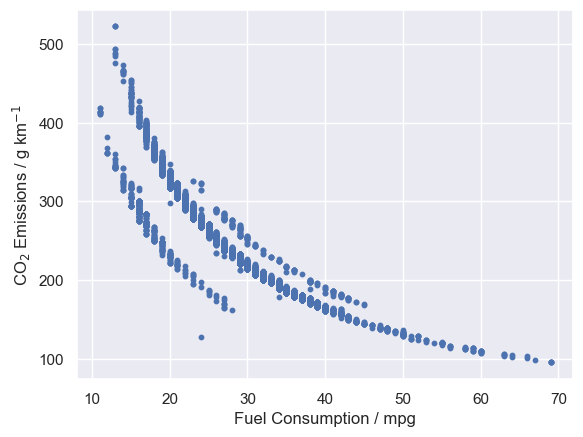

In [7]:
lin_plot("fuel_cons_comb_mpg", "Fuel Consumption / mpg", True, "init_fuel_cons_mpg.png")

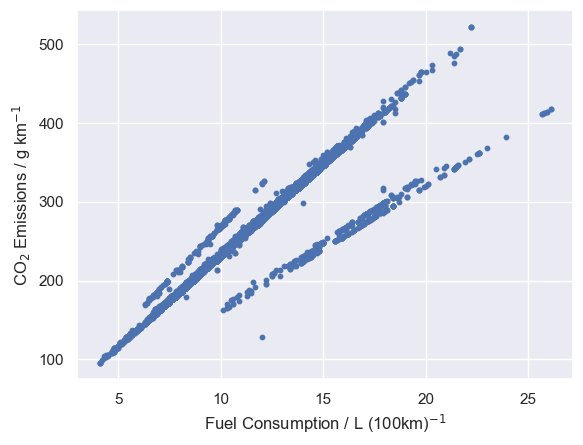

In [8]:
lin_plot("fuel_cons_comb", "Fuel Consumption / L (100km)$^{-1}$", True, "init_fuel_cons.png")

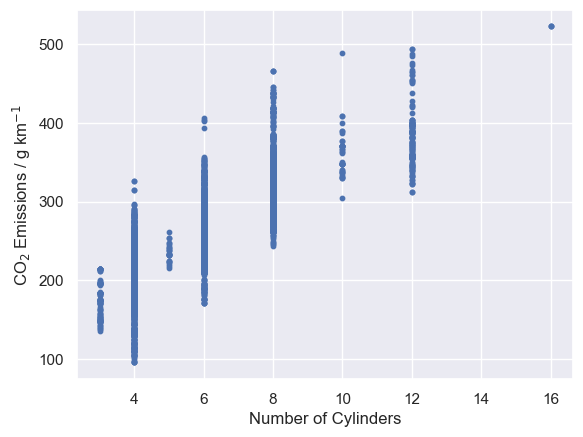

In [9]:
lin_plot("cylinders", "Number of Cylinders", True, "init_cylinders.png")

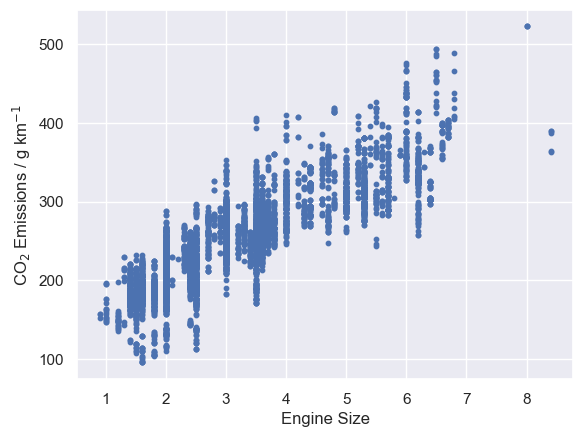

In [10]:
lin_plot("engine_size", "Engine Size", True, "init_engine_size.png")

### Linear Regression

In [11]:
def lin_reg_plot(df, x, xlab, R2, name):
    
    ax = df.plot(x=x, y="co2", kind="scatter", s=10)
    ax = df.plot(x=x, y="pred_co2", kind="line", ax=ax, c="r", 
                 label="Predicted CO$_{2}$ Emissions \n R$^{2}$: " + str(R2))
    #plt.axhline(y = 255, color = "black", linestyle = '--', label="High Emissions") 
    _ = ax.set_xlabel(xlab)
    _ = ax.set_ylabel("CO$_{2}$ Emissions / g km$^{-1}$")
    _ = ax.legend()

    plt.savefig("Plots/" + name, dpi=300)
    
    plt.show()
    
    return

Fuel Consumption Combined

In [12]:
X = co2[["fuel_cons_comb"]]
y = co2["co2"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Slope:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Slope: [18.57131902]
Intercept: 46.76315221749732


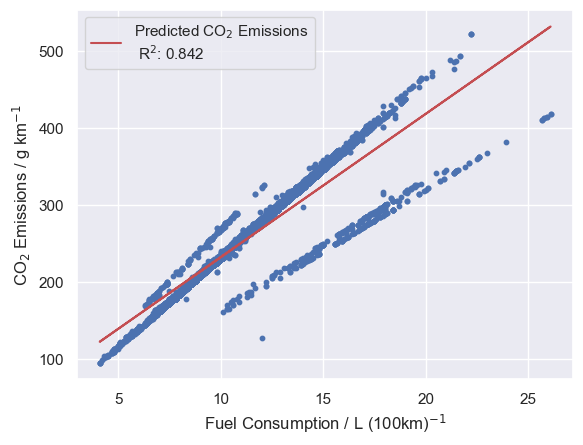

In [13]:
y_pred = lin_reg.predict(X)
co2_pred = co2.copy()
co2_pred["pred_co2"] = y_pred

R2 = 0.842

lin_reg_plot(co2_pred, "fuel_cons_comb", "Fuel Consumption / L (100km)$^{-1}$", R2, "init_pred_fuel_cons.png")

Engine Size

In [14]:
X = co2[["engine_size"]]
y = co2["co2"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Slope:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Slope: [36.77731519]
Intercept: 134.3658927234909


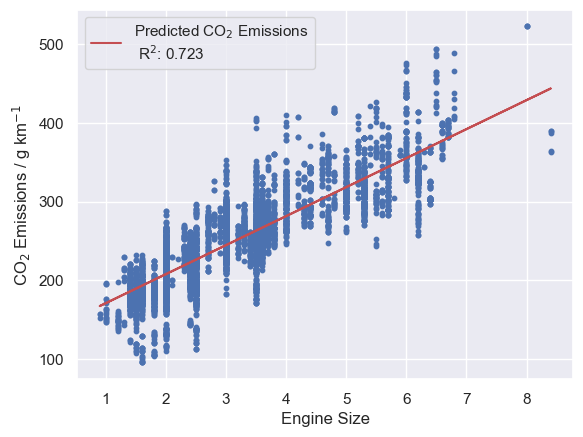

In [15]:
y_pred = lin_reg.predict(X)
co2_pred = co2.copy()
co2_pred["pred_co2"] = y_pred

R2 = 0.723

lin_reg_plot(co2_pred, "engine_size", "Engine Size", R2, "init_pred_engine_size.png")

Cylinders

In [16]:
X = co2[["cylinders"]]
y = co2["co2"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Slope:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Slope: [26.64772433]
Intercept: 100.95691469372929


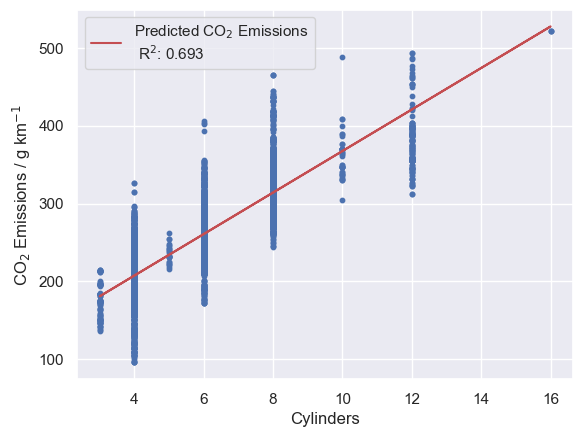

In [17]:
y_pred = lin_reg.predict(X)
co2_pred = co2.copy()
co2_pred["pred_co2"] = y_pred

R2 = 0.693

lin_reg_plot(co2_pred, "cylinders", "Cylinders", R2, "init_pred_cylinders.png")

### One hot encoding all data

In [18]:
co2_prep = co2.drop(columns=["make", "model", "fuel_cons_city", "fuel_cons_hwy"])

X_num = co2_prep.select_dtypes(exclude='object')
X_cat = co2_prep.select_dtypes(include='object')

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_cat)
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(X_cat.columns) for cat in encoder.categories_[i]]
one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns)
co2_enc = X_num.join(one_hot_features)

In [19]:
y = co2_enc["co2"]
X = co2_enc.drop(columns="co2")
X.head()

,engine_size,cylinders,fuel_cons_comb,fuel_cons_comb_mpg,vehicle_class_COMPACT,vehicle_class_FULL-SIZE,vehicle_class_MID-SIZE,vehicle_class_MINICOMPACT,vehicle_class_MINIVAN,vehicle_class_PICKUP TRUCK - SMALL,...,transmission_AV7,transmission_AV8,transmission_M5,transmission_M6,transmission_M7,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z
0,2.0,4,8.5,33,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,9.6,29,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,5.9,48,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,11.1,25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,10.6,27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
co2.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [21]:
co2_prep = co2.drop(columns=["make", "model", "fuel_cons_city", "fuel_cons_hwy", "vehicle_class", "transmission"])

X_num = co2_prep.select_dtypes(exclude='object')
X_cat = co2_prep.select_dtypes(include='object')

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_cat)
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(X_cat.columns) for cat in encoder.categories_[i]]
one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns)
co2_enc_fuel = X_num.join(one_hot_features)

In [22]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg"])
X.head()

,engine_size,cylinders,fuel_cons_comb,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z
0,2.0,4,8.5,0.0,0.0,0.0,0.0,1.0
1,2.4,4,9.6,0.0,0.0,0.0,0.0,1.0
2,1.5,4,5.9,0.0,0.0,0.0,0.0,1.0
3,3.5,6,11.1,0.0,0.0,0.0,0.0,1.0
4,3.5,6,10.6,0.0,0.0,0.0,0.0,1.0


In [23]:
co2.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Linear Regression with Test-Train Split

Slope: 18.62
Intercept: 46.27


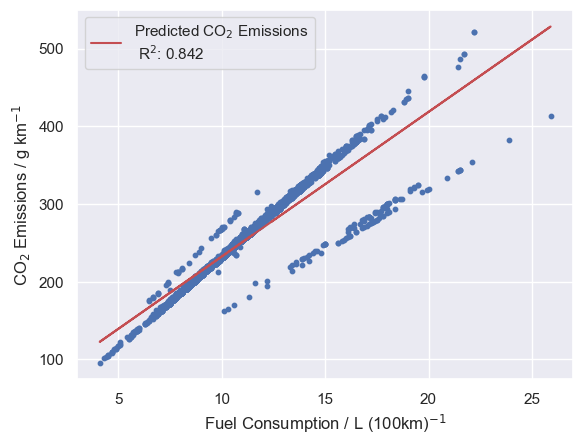

R2 train: 0.8448
R2 test: 0.838
MSE: 547.8
MAE: 14.0


In [23]:
X = co2[["fuel_cons_comb"]]
y = co2["co2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

slope = lin_reg.coef_[0]
inter = lin_reg.intercept_
print('Slope:', round(slope, 2))
print('Intercept:', round(inter, 2))

y_pred = lin_reg.predict(X_test)
data_test = X_test.copy(deep=True)
data_test["co2"] = y_test
data_test["pred_co2"] = y_pred

R2 = 0.842

lin_reg_plot(data_test, "fuel_cons_comb", "Fuel Consumption / L (100km)$^{-1}$", R2, "init_pred_fuel_cons.png")

# The .score(X) method returns runs lin_reg.predict(X) with respect to y, and returns the R2 score
R2_train = lin_reg.score(X_train, y_train)
R2_test = lin_reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 train:", round(R2_train, 4))
print("R2 test:", round(R2_test, 4))
print("MSE:", round(mse, 1))
print("MAE:", round(mae, 1))

## Predicted vs Actual

In [24]:
def plot_pred_actual(pred, actual, method, filename): 
    
    max_actual = max(actual)
    max_pred = max(pred)
    highest = int(max(max_actual, max_actual))
    plot_same = list(range(80, highest+2))
    
    plt.scatter(x=actual, y=pred, s=10)
    plt.plot(plot_same, plot_same, c="red", label="Predicted = Actual")
    plt.title("Predicted against Measured CO$_{2}$ Emissions \n using " + method)
    plt.ylabel("Predicted CO$_{2}$ Emissions / g km$^{-1}$")
    plt.xlabel("Actual CO$_{2}$ Emissions / g km$^{-1}$")
    plt.legend()

    plt.savefig("Plots/" + filename, dpi=300)
    
    plt.show()
    
    return

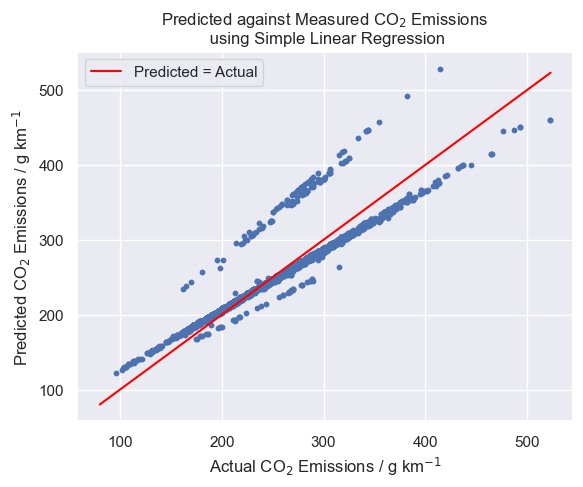

In [25]:
plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Simple Linear Regression", "pred_act_fuel_cons.png")

In [26]:
X_test = X_test.values.tolist()

In [27]:
print(X_test[0:10])

[[11.5], [9.7], [14.3], [10.8], [8.7], [7.6], [10.2], [9.2], [10.8], [8.6]]


In [28]:
X_test_indiv = []

for val in X_test:
    X_test_indiv.append(val[0])
    
print(X_test_indiv[0:10])

[11.5, 9.7, 14.3, 10.8, 8.7, 7.6, 10.2, 9.2, 10.8, 8.6]


In [29]:
pred = []

for num in X_test_indiv:
    val = (slope*num) + inter
    pred.append(val)
    
print(pred[0:10])

[260.4027590393751, 226.88679450448237, 312.53870387143047, 247.36877283136127, 208.26681420731973, 187.78483588044085, 236.19678465306367, 217.57680435590103, 247.36877283136127, 206.40481617760346]


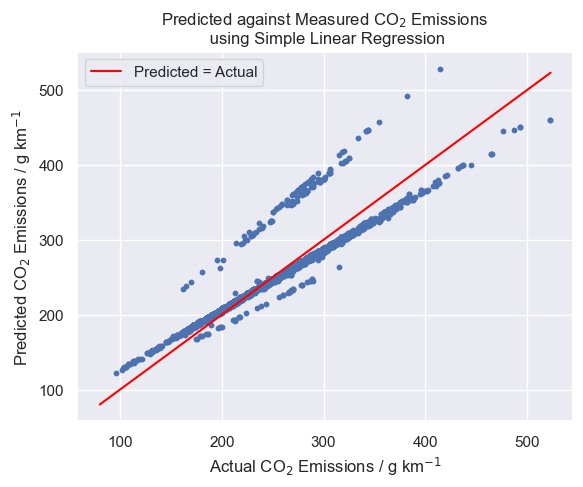

In [30]:
plot_pred_actual(pred, y_test, "Simple Linear Regression", "pred_act_fuel_cons.png")

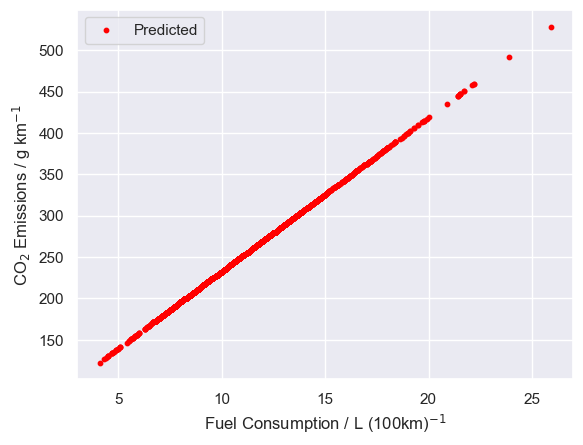

In [31]:
plt.scatter(X_test_indiv, pred, c="red", label="Predicted", s=10)
plt.ylabel("CO$_{2}$ Emissions / g km$^{-1}$")
plt.xlabel("Fuel Consumption / L (100km)$^{-1}$")
plt.legend()
    
plt.show()

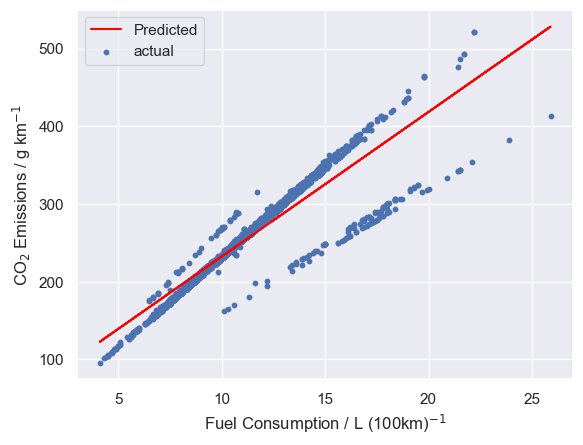

In [32]:
plt.plot(X_test_indiv, pred, c="red", label="Predicted")
plt.scatter(X_test_indiv, y_test.tolist(), s=10, label="actual")
plt.ylabel("CO$_{2}$ Emissions / g km$^{-1}$")
plt.xlabel("Fuel Consumption / L (100km)$^{-1}$")
plt.legend()
    
plt.show()

In [33]:
def pred_actual_lin(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    slope = lin_reg.coef_[0]
    inter = lin_reg.intercept_

    y_pred = lin_reg.predict(X_test)
    
    return y_pred, y_test

### Engine Size

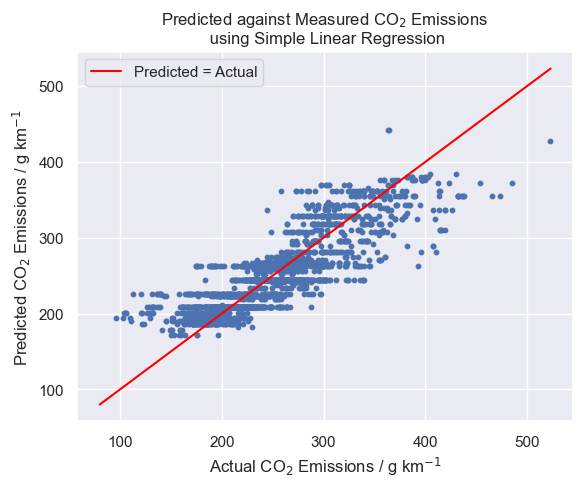

In [34]:
X = co2[["engine_size"]]
y = co2["co2"]

y_pred, y_test = pred_actual_lin(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Simple Linear Regression", "pred_act_eng_size.png")

### Number of Cylinders

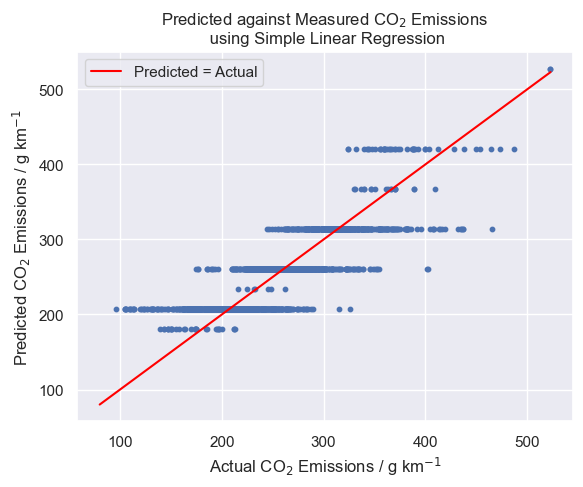

In [35]:
X = co2[["cylinders"]]
y = co2["co2"]

y_pred, y_test = pred_actual_lin(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Simple Linear Regression", "pred_act_cyl.png")

## Multi-Linear Regression

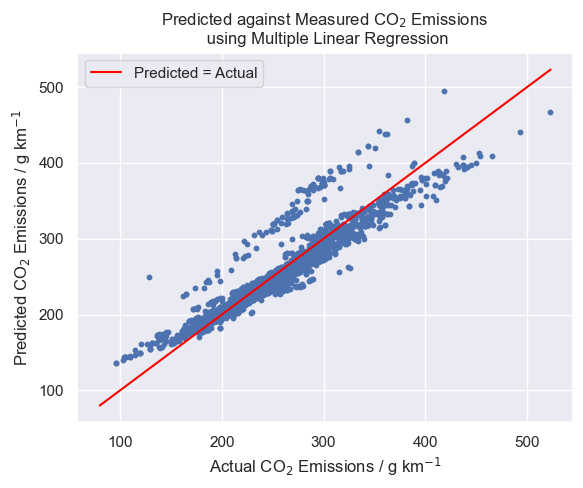

In [36]:
X = co2[["fuel_cons_comb", "engine_size"]]
y = co2["co2"]

y_pred, y_test = pred_actual_lin(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Multiple Linear Regression", "pred_act_multi1.png")

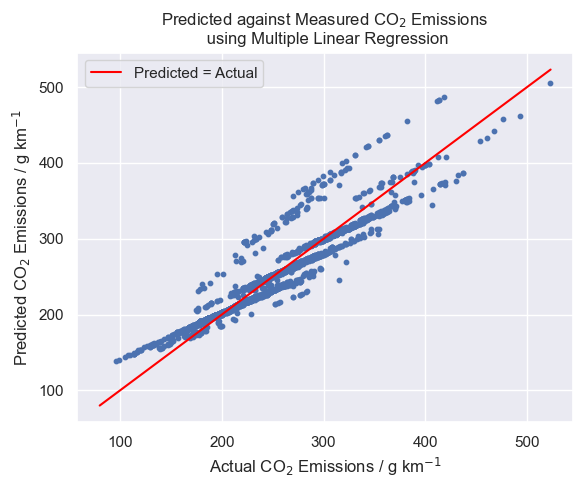

In [37]:
X = co2[["fuel_cons_comb", "cylinders"]]
y = co2["co2"]

y_pred, y_test = pred_actual_lin(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Multiple Linear Regression", "pred_act_multi2.png")

   cylinders  fuel_cons_comb  fuel_type_D  fuel_type_E  fuel_type_N  \
0          4             8.5          0.0          0.0          0.0   
1          4             9.6          0.0          0.0          0.0   
2          4             5.9          0.0          0.0          0.0   
3          6            11.1          0.0          0.0          0.0   
4          6            10.6          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


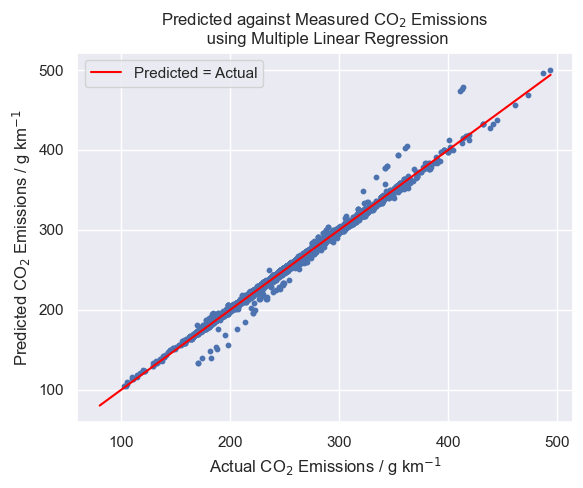

In [177]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg", "engine_size"])
print(X.head())

y_pred, y_test = pred_actual_lin(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Multiple Linear Regression", "pred_act_multi3.png")

   engine_size  fuel_cons_comb  fuel_type_D  fuel_type_E  fuel_type_N  \
0          2.0             8.5          0.0          0.0          0.0   
1          2.4             9.6          0.0          0.0          0.0   
2          1.5             5.9          0.0          0.0          0.0   
3          3.5            11.1          0.0          0.0          0.0   
4          3.5            10.6          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


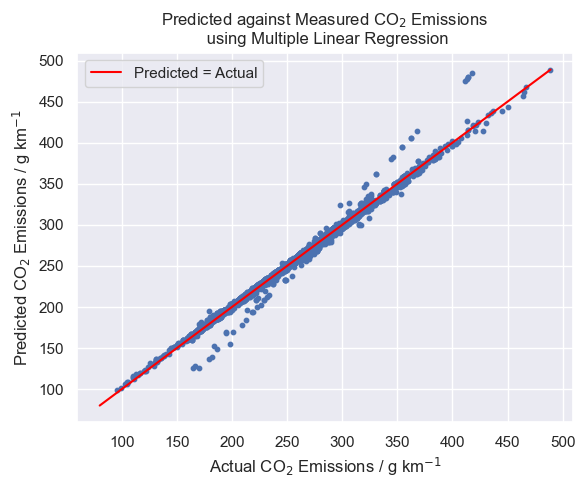

In [178]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg", "cylinders"])
print(X.head())

y_pred, y_test = pred_actual_lin(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Multiple Linear Regression", "pred_act_multi4.png")

   cylinders  fuel_cons_comb_mpg  fuel_type_D  fuel_type_E  fuel_type_N  \
0          4                  33          0.0          0.0          0.0   
1          4                  29          0.0          0.0          0.0   
2          4                  48          0.0          0.0          0.0   
3          6                  25          0.0          0.0          0.0   
4          6                  27          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


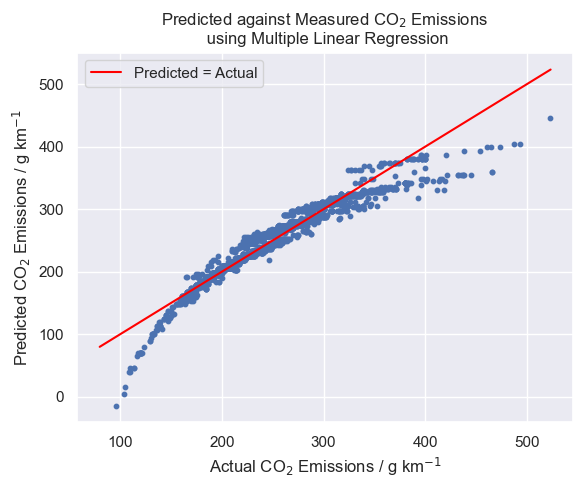

In [174]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "engine_size"])
print(X.head())

y_pred, y_test = pred_actual_lin(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Multiple Linear Regression", "pred_act_multi5.png")

   engine_size  fuel_cons_comb_mpg  fuel_type_D  fuel_type_E  fuel_type_N  \
0          2.0                  33          0.0          0.0          0.0   
1          2.4                  29          0.0          0.0          0.0   
2          1.5                  48          0.0          0.0          0.0   
3          3.5                  25          0.0          0.0          0.0   
4          3.5                  27          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


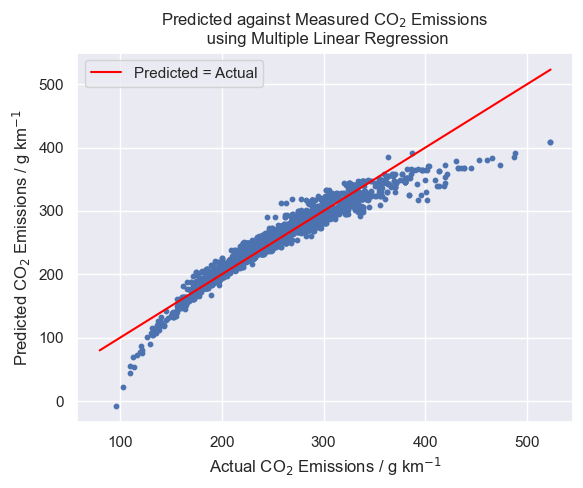

In [175]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "cylinders"])
print(X.head())

y_pred, y_test = pred_actual_lin(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Multiple Linear Regression", "pred_act_multi6.png")

### Linear Regression with K-Fold Cross Validation

In [42]:
def model_score_show(model, X, y):
    
    scoring_methods = ["r2", "neg_mean_squared_error", "neg_mean_absolute_error"]
    
    for scoring in scoring_methods:
        # Data is sorted by make of car so shuffle dataset 
        cv = RepeatedKFold(n_splits=10, n_repeats=5)
        score = cross_val_score(model, X, y, cv=cv, scoring=scoring)

        print("Score type:", scoring)
        print("Maximum score:", round(max(score), 4))
        print("Minimum score:", round(min(score), 4))
        print("Mean score:", round(np.mean(score), 4))
        print("Standard deviation:", round(np.std(score), 4))
        print("\n")
    
    return

In [43]:
lin_reg = LinearRegression()
X = co2[["fuel_cons_comb"]]
y = co2["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.8885
Minimum score: 0.802
Mean score: 0.8422
Standard deviation: 0.0181


Score type: neg_mean_squared_error
Maximum score: -406.2282
Minimum score: -676.2109
Mean score: -538.8647
Standard deviation: 61.9934


Score type: neg_mean_absolute_error
Maximum score: -13.0473
Minimum score: -15.9479
Mean score: -14.0698
Standard deviation: 0.5396




In [44]:
lin_reg = LinearRegression()
X = co2[["engine_size"]]
y = co2["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.7674
Minimum score: 0.681
Mean score: 0.7236
Standard deviation: 0.0187


Score type: neg_mean_squared_error
Maximum score: -781.6608
Minimum score: -1069.5484
Mean score: -943.8288
Standard deviation: 61.5446


Score type: neg_mean_absolute_error
Maximum score: -22.0831
Minimum score: -25.7707
Mean score: -23.2953
Standard deviation: 0.6827




In [45]:
lin_reg = LinearRegression()
X = co2[["cylinders"]]
y = co2["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.7258
Minimum score: 0.6511
Mean score: 0.6923
Standard deviation: 0.0176


Score type: neg_mean_squared_error
Maximum score: -918.1518
Minimum score: -1213.49
Mean score: -1050.719
Standard deviation: 74.1909


Score type: neg_mean_absolute_error
Maximum score: -23.0497
Minimum score: -26.1855
Mean score: -24.5965
Standard deviation: 0.8049




In [46]:
lin_reg = LinearRegression()
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.8554
Minimum score: 0.7901
Mean score: 0.823
Standard deviation: 0.0131


Score type: neg_mean_squared_error
Maximum score: -512.9565
Minimum score: -725.0522
Mean score: -605.4648
Standard deviation: 48.4395


Score type: neg_mean_absolute_error
Maximum score: -14.5041
Minimum score: -18.1872
Mean score: -16.216
Standard deviation: 0.7225




In [47]:
lin_reg = LinearRegression()
X = co2[["engine_size", "fuel_cons_comb"]]
y = co2["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.8966
Minimum score: 0.8415
Mean score: 0.8728
Standard deviation: 0.0124


Score type: neg_mean_squared_error
Maximum score: -344.6145
Minimum score: -526.1523
Mean score: -433.8126
Standard deviation: 37.4592


Score type: neg_mean_absolute_error
Maximum score: -12.2513
Minimum score: -14.4314
Mean score: -13.4866
Standard deviation: 0.5217




In [48]:
lin_reg = LinearRegression()
X = co2[["cylinders", "fuel_cons_comb"]]
y = co2["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.8985
Minimum score: 0.848
Mean score: 0.8767
Standard deviation: 0.0101


Score type: neg_mean_squared_error
Maximum score: -340.4506
Minimum score: -527.4861
Mean score: -420.7118
Standard deviation: 35.6797


Score type: neg_mean_absolute_error
Maximum score: -12.3922
Minimum score: -15.106
Mean score: -13.5341
Standard deviation: 0.6146




In [49]:
lin_reg = LinearRegression()
X = co2[["engine_size", "fuel_cons_comb_mpg"]]
y = co2["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.9029
Minimum score: 0.8647
Mean score: 0.8857
Standard deviation: 0.0077


Score type: neg_mean_squared_error
Maximum score: -335.4338
Minimum score: -473.8984
Mean score: -390.1687
Standard deviation: 32.8393


Score type: neg_mean_absolute_error
Maximum score: -11.8267
Minimum score: -14.131
Mean score: -13.1351
Standard deviation: 0.5269




In [50]:
lin_reg = LinearRegression()
X = co2[["cylinders", "fuel_cons_comb_mpg"]]
y = co2["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.9107
Minimum score: 0.8669
Mean score: 0.8902
Standard deviation: 0.0086


Score type: neg_mean_squared_error
Maximum score: -298.8941
Minimum score: -429.326
Mean score: -375.3801
Standard deviation: 26.841


Score type: neg_mean_absolute_error
Maximum score: -11.3575
Minimum score: -13.5131
Mean score: -12.714
Standard deviation: 0.5428




In [167]:
lin_reg = LinearRegression()
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg", "cylinders", "engine_size"])
print(X.head())

model_score_show(lin_reg, X, y)

   fuel_cons_comb  fuel_type_D  fuel_type_E  fuel_type_N  fuel_type_X  \
0             8.5          0.0          0.0          0.0          0.0   
1             9.6          0.0          0.0          0.0          0.0   
2             5.9          0.0          0.0          0.0          0.0   
3            11.1          0.0          0.0          0.0          0.0   
4            10.6          0.0          0.0          0.0          0.0   

   fuel_type_Z  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
Score type: r2
Maximum score: 0.9936
Minimum score: -8.398388591327625e+19
Mean score: -5.241173067720691e+18
Standard deviation: 1.712308064085805e+19


Score type: neg_mean_squared_error
Maximum score: -19.0502
Minimum score: -9.420461734464585e+23
Mean score: -3.2824551141890836e+22
Standard deviation: 1.4449688557963372e+23


Score type: neg_mean_absolute_error
Maximum score: -2.737
Minimum score: -36240308257.1284
Mean score: -1604377003.8444
Standar

In [52]:
lin_reg = LinearRegression()
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "cylinders"])

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.9377
Minimum score: -5.874002564345321e+21
Mean score: -1.7913409739119018e+20
Standard deviation: 9.183884923056187e+20


Score type: neg_mean_squared_error
Maximum score: -170.4798
Minimum score: -1.2083417701607391e+24
Mean score: -4.508391876199734e+22
Standard deviation: 2.214620864872322e+23


Score type: neg_mean_absolute_error
Maximum score: -9.841
Minimum score: -80258036759.5378
Mean score: -3863706132.9536
Standard deviation: 15578377871.5079




In [53]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg", "engine_size"])

lin_reg = LinearRegression()
model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.9943
Minimum score: -1.9852316183654446e+20
Mean score: -7.198202053136785e+18
Standard deviation: 3.229597285372482e+19


Score type: neg_mean_squared_error
Maximum score: -19.5973
Minimum score: -7.309455273677932e+23
Mean score: -3.4715367880484152e+22
Standard deviation: 1.3322820634761872e+23


Score type: neg_mean_absolute_error
Maximum score: -2.8103
Minimum score: -18484972812.1841
Mean score: -1294920343.3773
Standard deviation: 4112054961.566




### Investigating Separate Lines in Data 

In [55]:
def plot_colour_coded(hue_type, n_col, filename):

    name = hue_type.replace("_", " ").capitalize()
    sp = sns.scatterplot(x="fuel_cons_comb", y="co2", data=co2, hue=hue_type)
    #plt.axhline(y = 255, color = "black", linestyle = '--', label="High Emissions") 
    sp.set(xlabel ="Fuel Consumption / L (100km)$^{-1}$", ylabel = "CO$_{2}$ Emissions / g km$^{-1}$", 
           title="CO$_{2}$ Emissions against Fuel Consumption")
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0, ncol=n_col, fontsize="small", 
               title=name)

    plt.savefig("Plots/" + filename, dpi=300)
    
    plt.show()
    
    return

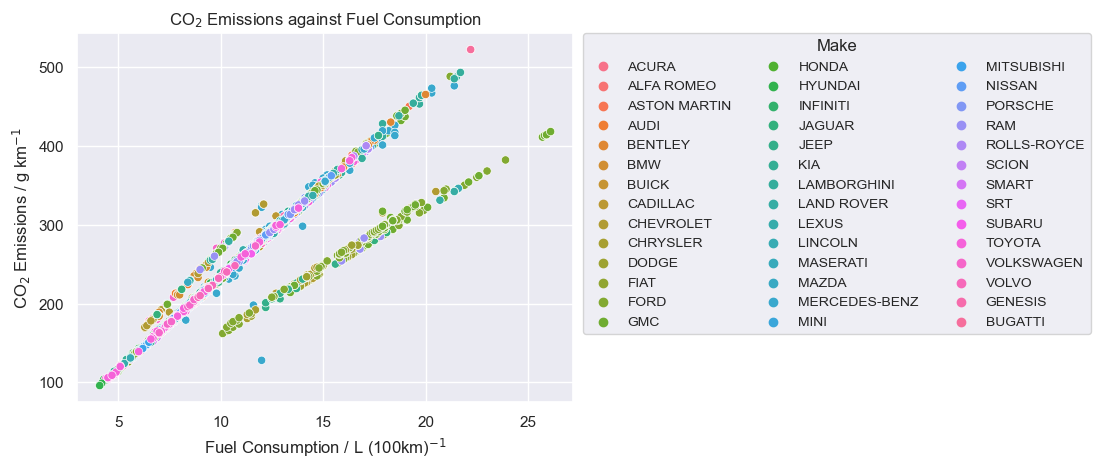

In [56]:
plot_colour_coded("make", 3, "fuel_cons_by_make.png")

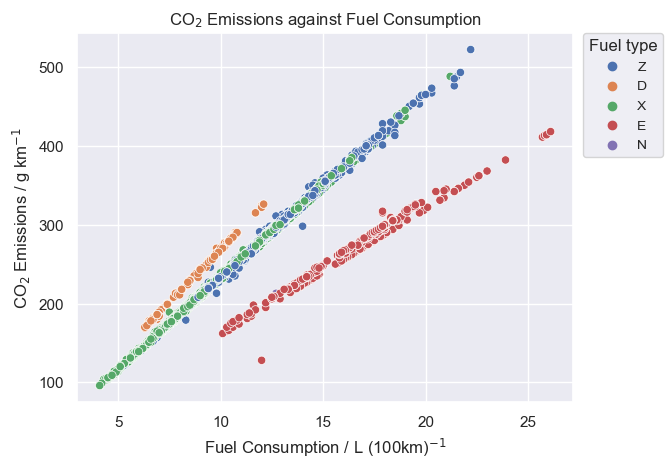

In [57]:
plot_colour_coded("fuel_type", 1, "fuel_cons_by_fuel.png")

### Separating data based on fuel type

In [58]:
co2_diesel = co2.copy()
co2_diesel["diesel"] = co2_diesel["fuel_type"] == "D"
co2_diesel.drop(co2_diesel[co2_diesel["diesel"] != True].index, inplace=True)
co2_diesel.drop("diesel", axis=1, inplace=True)
co2_diesel.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
28,AUDI,A6 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.2,8.1,35,217
30,AUDI,A7 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.2,8.1,35,217
33,AUDI,A8 TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.5,8.4,34,224
37,AUDI,A8L TDI (modified),FULL-SIZE,3.0,6,AS8,D,9.8,6.5,8.4,34,224
41,AUDI,Q5 TDI (modified),SUV - SMALL,3.0,6,AS8,D,10.2,7.8,9.0,31,244


In [59]:
co2_ethanol = co2.copy()
co2_ethanol["ethanol"] = co2_ethanol["fuel_type"] == "E"
co2_ethanol.drop(co2_ethanol[co2_ethanol["ethanol"] != True].index, inplace=True)
co2_ethanol.drop("ethanol", axis=1, inplace=True)
co2_ethanol.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
145,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,E,18.4,12.2,15.6,18,250
147,BUICK,LACROSSE AWD,MID-SIZE,3.6,6,AS6,E,19.4,13.0,16.5,17,264
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
206,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,E,18.8,13.1,16.2,17,259


In [60]:
co2_other = co2.copy()
co2_other.drop(co2_other[co2_other["fuel_type"] == "E"].index, inplace=True)
co2_other.drop(co2_other[co2_other["fuel_type"] == "D"].index, inplace=True)
co2_other.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Separate Fuel Linear Regression

In [61]:
def lin_reg_plot2(df, x, xlab):
    
    ax = df.plot(x=x, y="co2", kind="scatter", s=10)
    ax = df.plot(x=x, y="pred_co2", kind="line", ax=ax, c="red", label="Predicted CO$_{2}$ Emissions")
    #plt.axhline(y = 255, color = "black", linestyle = '--', label="High Emissions") 
    _ = ax.set_xlabel(xlab)
    _ = ax.set_ylabel("CO$_{2}$ Emissions / g km$^{-1}$")
    _ = ax.legend()
    
    return

In [62]:
def co2_consump_lin_reg(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    print('Slope:', lin_reg.coef_)
    print('Intercept:', lin_reg.intercept_)

    y_pred = lin_reg.predict(X_test)
    data_test = X_test.copy(deep=True)
    data_test["co2"] = y_test
    data_test["pred_co2"] = y_pred

    lin_reg_plot2(data_test, "fuel_cons_comb", "Fuel Consumption / L (100km)$^{-1}$")

    R2_train = lin_reg.score(X_train, y_train)
    R2_test = lin_reg.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("R2 test:", round(R2_test, 4))
    print("MSE:", round(mse, 4))
    print("MAE:", round(mae, 4))
    
    return y_test, y_pred

Slope: [23.24095644]
Intercept: 0.6279862850840914
R2 test: 0.9979
MSE: 7.6476
MAE: 2.1967


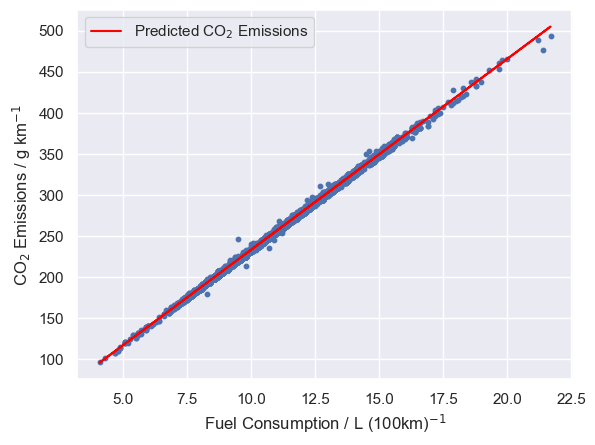

In [63]:
X = co2_other[["fuel_cons_comb"]]
y = co2_other["co2"]

y_test, y_pred = co2_consump_lin_reg(X, y)

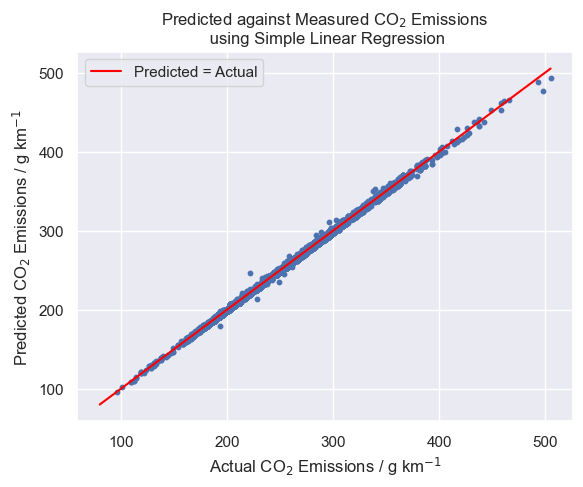

In [64]:
plot_pred_actual(y_test.tolist(), y_pred.tolist(), "Simple Linear Regression", "pred_act_fuel_cons_other.png")

### Separate Fuel Linear Regression with K-Fold Cross Validation

*Regular Gasoline, Premium Gasoline and Natural Gas*

In [65]:
lin_reg = LinearRegression()
X = co2_other[["fuel_cons_comb"]]
y = co2_other["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.9983
Minimum score: 0.9939
Mean score: 0.9976
Standard deviation: 0.001


Score type: neg_mean_squared_error
Maximum score: -6.0007
Minimum score: -17.1987
Mean score: -8.1556
Standard deviation: 2.9541


Score type: neg_mean_absolute_error
Maximum score: -2.0688
Minimum score: -2.3638
Mean score: -2.1777
Standard deviation: 0.0671




In [66]:
lin_reg = LinearRegression()
X = co2_other[["fuel_cons_comb", "cylinders"]]
y = co2_other["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.9983
Minimum score: 0.9948
Mean score: 0.9977
Standard deviation: 0.0009


Score type: neg_mean_squared_error
Maximum score: -5.7992
Minimum score: -18.9622
Mean score: -8.1236
Standard deviation: 3.1587


Score type: neg_mean_absolute_error
Maximum score: -2.0389
Minimum score: -2.3417
Mean score: -2.1757
Standard deviation: 0.065




*Diesel*

In [67]:
lin_reg = LinearRegression()
X = co2_diesel[["fuel_cons_comb"]]
y = co2_diesel["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.9994
Minimum score: 0.9908
Mean score: 0.9981
Standard deviation: 0.0014


Score type: neg_mean_squared_error
Maximum score: -0.7843
Minimum score: -8.453
Mean score: -2.7958
Standard deviation: 1.5447


Score type: neg_mean_absolute_error
Maximum score: -0.7512
Minimum score: -1.9423
Mean score: -1.223
Standard deviation: 0.2445




In [68]:
lin_reg = LinearRegression()
X = co2_diesel[["fuel_cons_comb", "cylinders"]]
y = co2_diesel["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.9997
Minimum score: 0.9942
Mean score: 0.9982
Standard deviation: 0.0011


Score type: neg_mean_squared_error
Maximum score: -0.7668
Minimum score: -6.5687
Mean score: -2.8147
Standard deviation: 1.1552


Score type: neg_mean_absolute_error
Maximum score: -0.6766
Minimum score: -2.1311
Mean score: -1.2301
Standard deviation: 0.2903




*Ethanol*

In [69]:
lin_reg = LinearRegression()
X = co2_ethanol[["fuel_cons_comb"]]
y = co2_ethanol["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.9939
Minimum score: 0.9226
Mean score: 0.9808
Standard deviation: 0.0162


Score type: neg_mean_squared_error
Maximum score: -21.3782
Minimum score: -188.9205
Mean score: -41.4022
Standard deviation: 41.0675


Score type: neg_mean_absolute_error
Maximum score: -4.2849
Minimum score: -6.6633
Mean score: -4.9409
Standard deviation: 0.5664




In [70]:
lin_reg = LinearRegression()
X = co2_ethanol[["fuel_cons_comb", "cylinders"]]
y = co2_ethanol["co2"]

model_score_show(lin_reg, X, y)

Score type: r2
Maximum score: 0.9935
Minimum score: 0.8921
Mean score: 0.9806
Standard deviation: 0.0178


Score type: neg_mean_squared_error
Maximum score: -19.323
Minimum score: -178.0421
Mean score: -39.8149
Standard deviation: 39.8603


Score type: neg_mean_absolute_error
Maximum score: -3.7752
Minimum score: -7.2843
Mean score: -4.8209
Standard deviation: 0.6763




### Plotting lines on same graph

In [71]:
def find_pred_line(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    slope = lin_reg.coef_
    inter = lin_reg.intercept_

    return slope, inter

In [72]:
def kfold_model_score(X, y):

    model = LinearRegression()
    # Data is sorted by make of car so shuffle dataset 
    cv = RepeatedKFold(n_splits=10, n_repeats=5)
    score = cross_val_score(model, X, y, cv=cv, scoring="r2")

    return round(np.mean(score), 3)

In [73]:
def get_lin_pred(df):

    X1 = df[["fuel_cons_comb"]]
    y1 = df["co2"]
    r2 = kfold_model_score(X1, y1)
    slope, inter = find_pred_line(X1, y1)
    pred_df = co2.copy()
    pred = pred_df["fuel_cons_comb"]*slope + inter
    pred_df["pred"] = pred

    return pred_df, r2

In [74]:
pred_df_other, r2_other = get_lin_pred(co2_other)
pred_df_diesel, r2_diesel = get_lin_pred(co2_diesel)
pred_df_ethanol, r2_ethanol = get_lin_pred(co2_ethanol)

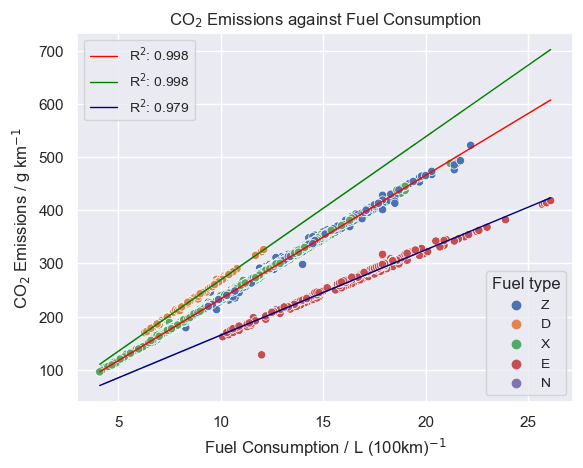

In [75]:
sp = sns.scatterplot(x="fuel_cons_comb", y="co2", data=co2, hue="fuel_type")
_ = sns.lineplot(x="fuel_cons_comb", y="pred", data=pred_df_other, c="red", linewidth=1, 
                 label="R$^{2}$: "+str(0.998))
_ = sns.lineplot(x="fuel_cons_comb", y="pred", data=pred_df_diesel, c="green", linewidth=1, 
                 label="R$^{2}$: "+str(0.998))
_ = sns.lineplot(x="fuel_cons_comb", y="pred", data=pred_df_ethanol, c="navy", linewidth=1, 
                 label="R$^{2}$: "+str(0.979))
#plt.axhline(y = 255, color = "black", linestyle = '--', label="High Emissions") 
sp.set(xlabel ="Fuel Consumption / L (100km)$^{-1}$", ylabel = "CO$_{2}$ Emissions / g km$^{-1}$", 
       title="CO$_{2}$ Emissions against Fuel Consumption")
h, l = sp.get_legend_handles_labels()
l1 = sp.legend(h[:5],l[:5], loc="lower right", ncol=1, fontsize="small", title="Fuel type")
l2 = sp.legend(h[5:],l[5:], loc="upper left", ncol=1, fontsize="small")
sp.add_artist(l1)
plt.savefig("Plots/sep_pred_fuel_cons.png", dpi=300)
plt.show()

### Polynomial Regression

In [76]:
def poly_reg_plot(df, x, R2, xlab, filename):
    
    ax = df.plot(x=x, y="co2", kind="scatter", s=8)
    ax = df.plot(x=x, y="pred_co2", kind="scatter", ax=ax, c="red", 
                 label="Predicted CO$_{2}$ Emissions \n R$^{2}$: " + str(R2), s=10)
    #plt.axhline(y = 255, color = "black", linestyle = '--', label="High Emissions") 
    _ = ax.set_xlabel(xlab)
    _ = ax.set_ylabel("CO$_{2}$ Emissions / g km$^{-1}$")
    _ = ax.legend()

    plt.savefig("Plots/" + filename, dpi=300)
    
    plt.show()
    
    return

In [77]:
def poly_diff_deg(X, y, deg, R2, filename):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    poly.fit(X_train_poly, y_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    data_test = X_test.copy()
    X_test_poly = poly.fit_transform(X_test)
    y_pred = poly_reg.predict(X_test_poly)

    data_test["co2"] = y_test
    data_test["pred_co2"] = y_pred

    poly_reg_plot(data_test, "fuel_cons_comb_mpg", R2, "Fuel Consumption / mpg", filename)

    R2_train = poly_reg.score(X_train_poly, y_train)
    R2_test = poly_reg.score(X_test_poly, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("R2 test:", round(R2_test, 4))
    print("MSE:", round(mse, 4))
    print("MAE:", round(mae, 4))

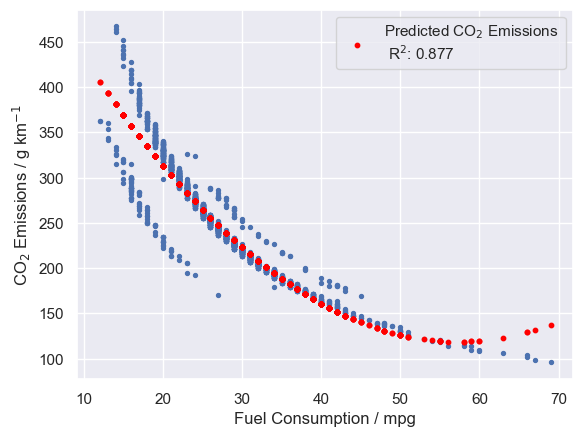

R2 test: 0.8821
MSE: 388.3568
MAE: 10.3933


In [78]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

R2 = 0.877

poly_diff_deg(X, y, 2, R2, "init_pred_fuel_cons_mpg_deg2.png")

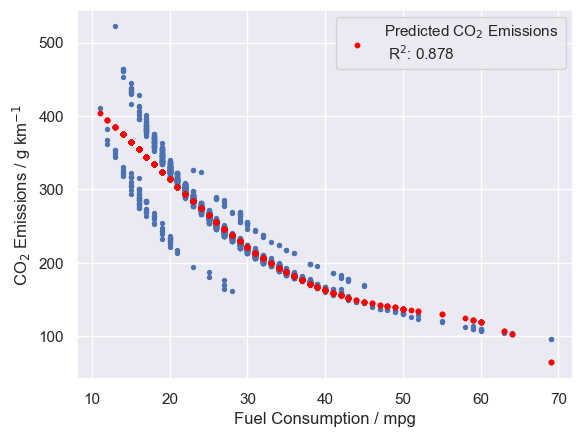

R2 test: 0.8924
MSE: 379.8037
MAE: 10.0654


In [79]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

R2 = 0.878

poly_diff_deg(X, y, 4, R2, "init_pred_fuel_cons_mpg_deg4.png")

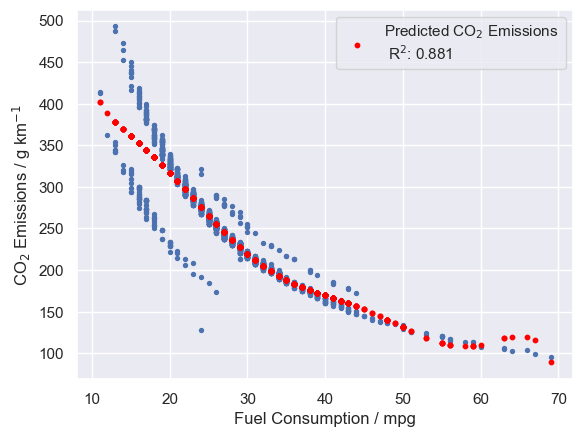

R2 test: 0.8875
MSE: 384.1542
MAE: 9.3629


In [158]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

R2 = 0.881

poly_diff_deg(X, y, 7, R2, "init_pred_fuel_cons_mpg_deg7.png")

## Predicted against Actual

In [80]:
def pred_actual_poly(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    poly.fit(X_train_poly, y_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    X_test_poly = poly.fit_transform(X_test)
    y_pred = poly_reg.predict(X_test_poly)
    
    return y_pred, y_test

In [165]:
def pred_actual_poly_deg7(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    poly = PolynomialFeatures(degree=7)
    X_train_poly = poly.fit_transform(X_train)
    poly.fit(X_train_poly, y_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    X_test_poly = poly.fit_transform(X_test)
    y_pred = poly_reg.predict(X_test_poly)
    
    return y_pred, y_test

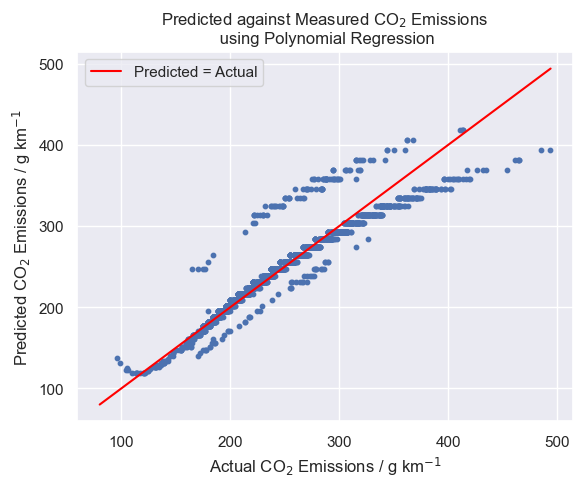

In [166]:
y = co2["co2"]
X = co2[["fuel_cons_comb_mpg"]]

y_pred, y_test = pred_actual_poly(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Polynomial Regression", "pred_act_poly_deg7.png")

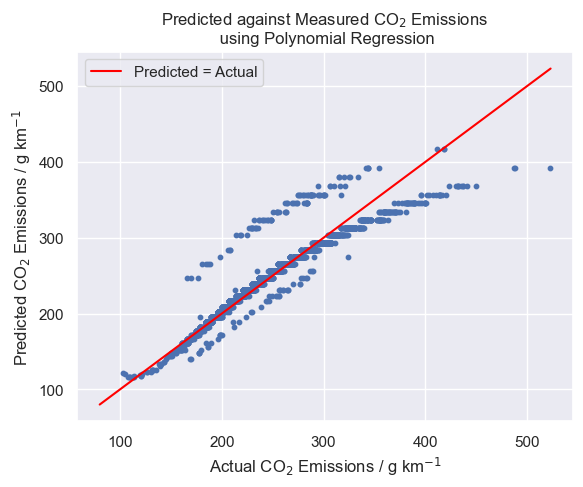

In [81]:
y = co2["co2"]
X = co2[["fuel_cons_comb_mpg"]]

y_pred, y_test = pred_actual_poly(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Polynomial Regression", "pred_act_poly1.png")

   engine_size  fuel_cons_comb_mpg  fuel_type_D  fuel_type_E  fuel_type_N  \
0          2.0                  33          0.0          0.0          0.0   
1          2.4                  29          0.0          0.0          0.0   
2          1.5                  48          0.0          0.0          0.0   
3          3.5                  25          0.0          0.0          0.0   
4          3.5                  27          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


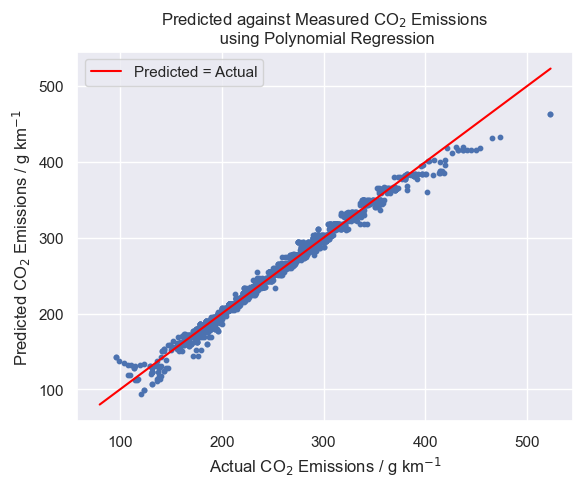

In [82]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "cylinders"])
print(X.head())

y_pred, y_test = pred_actual_poly(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Polynomial Regression", "pred_act_poly2.png")

   cylinders  fuel_cons_comb_mpg  fuel_type_D  fuel_type_E  fuel_type_N  \
0          4                  33          0.0          0.0          0.0   
1          4                  29          0.0          0.0          0.0   
2          4                  48          0.0          0.0          0.0   
3          6                  25          0.0          0.0          0.0   
4          6                  27          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


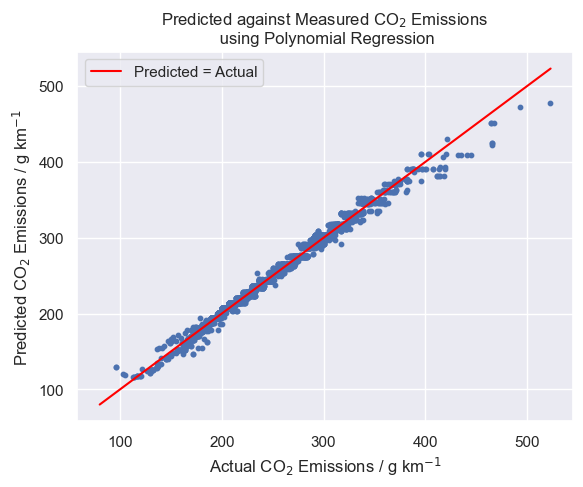

In [83]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "engine_size"])
print(X.head())

y_pred, y_test = pred_actual_poly(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Polynomial Regression", "pred_act_poly3.png")

   cylinders  fuel_cons_comb  fuel_type_D  fuel_type_E  fuel_type_N  \
0          4             8.5          0.0          0.0          0.0   
1          4             9.6          0.0          0.0          0.0   
2          4             5.9          0.0          0.0          0.0   
3          6            11.1          0.0          0.0          0.0   
4          6            10.6          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


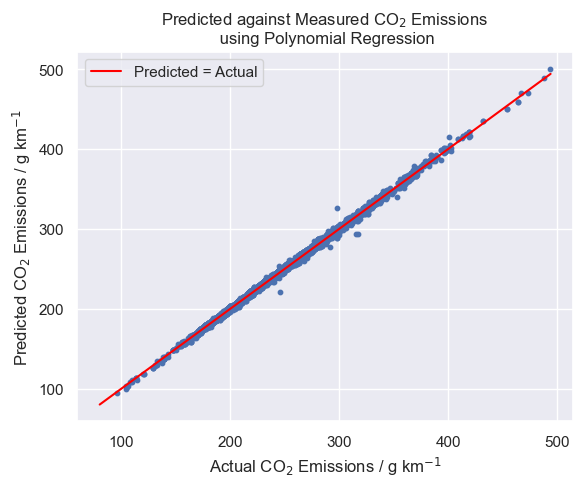

In [84]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg", "engine_size"])
print(X.head())

y_pred, y_test = pred_actual_poly(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Polynomial Regression", "pred_act_poly4.png")

   engine_size  fuel_cons_comb  fuel_type_D  fuel_type_E  fuel_type_N  \
0          2.0             8.5          0.0          0.0          0.0   
1          2.4             9.6          0.0          0.0          0.0   
2          1.5             5.9          0.0          0.0          0.0   
3          3.5            11.1          0.0          0.0          0.0   
4          3.5            10.6          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


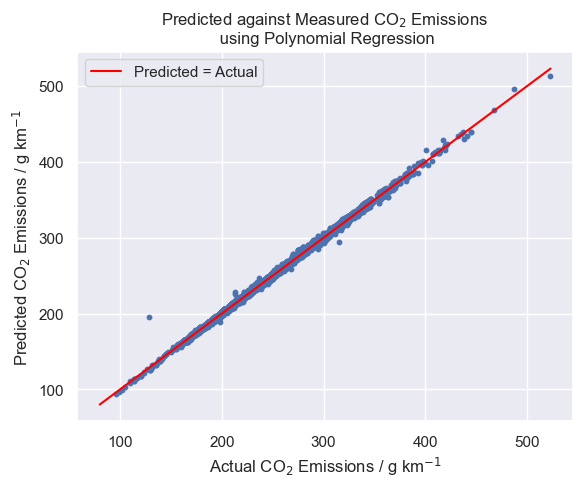

In [85]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg", "cylinders"])
print(X.head())

y_pred, y_test = pred_actual_poly(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Polynomial Regression", "pred_act_poly5.png")

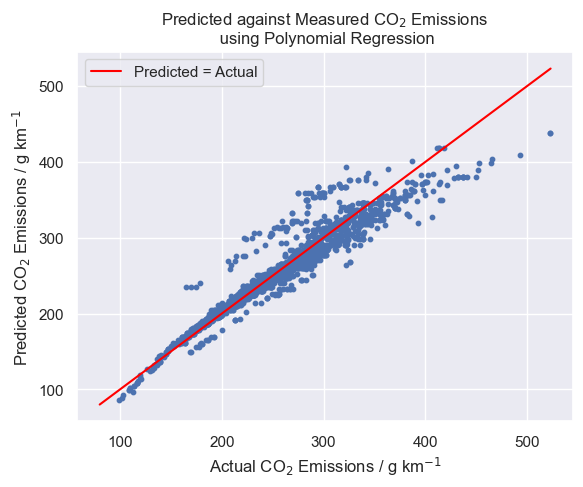

In [86]:
y = co2["co2"]
X = co2[["fuel_cons_comb_mpg", "engine_size"]]

y_pred, y_test = pred_actual_poly(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Polynomial Regression", "pred_act_poly6.png")

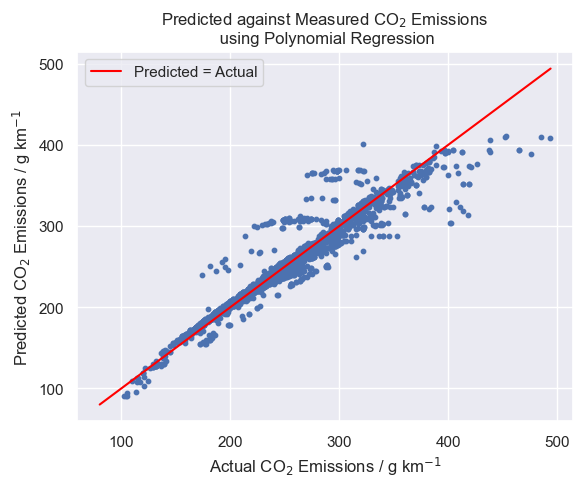

In [87]:
y = co2["co2"]
X = co2[["fuel_cons_comb", "engine_size"]]

y_pred, y_test = pred_actual_poly(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Polynomial Regression", "pred_act_poly7.png")

### Polynomial with K-fold Cross Validation

In [161]:
def mse_vs_poly_deg(X, y, savefig, filename):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    maxdegree = 10
    training_error = []
    cross_validation_error = []
    for d in range(1, maxdegree):
        x_poly_train = PolynomialFeatures(degree=d).fit_transform(X_train)
        x_poly_test = PolynomialFeatures(degree=d).fit_transform(X_test)
        lr = LinearRegression(fit_intercept=False)
        model = lr.fit(x_poly_train,y_train)
        y_train_pred = model.predict(x_poly_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        cve = cross_validate(lr, x_poly_train, y_train, scoring='neg_mean_squared_error', cv=5, 
                             return_train_score=True)
        training_error.append(mse_train)
        cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))

    print(cross_validation_error)
    fig,ax = plt.subplots(figsize=(7,5))
    _ = ax.plot(range(1, maxdegree), cross_validation_error)
    _ = ax.set_xlabel("Degree", fontsize=12)
    _ = ax.set_ylabel("MSE", fontsize=12)
    _ = ax.set_title("MSE VS Degree", fontsize=15)
    
    if savefig:
        plt.savefig("Plots/" + filename, dpi=300)
        
    plt.show()
    
    return

[636.9987263870803, 444.2564472863716, 441.7406678758451, 437.5724251405598, 434.02265266226505, 434.0721860864035, 431.81798665399236, 433.87823418923335, 441.28833198588484]


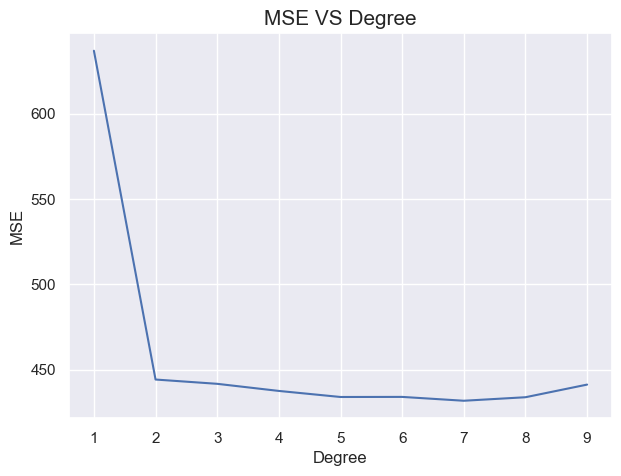

In [164]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

mse_vs_poly_deg(X, y, True, "MSE_vs_deg.png")

[377.25835094204956, 310.5929915535042, 279.55001595197507, 265.9970478554484, 256.0030915139178, 554.061101272933, 1992041569.5477035, 4445816266.377993, 1235383043.2947068]


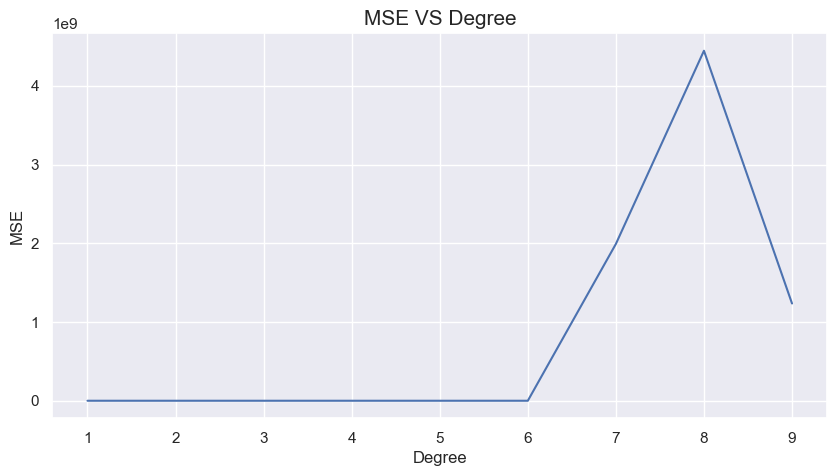

In [90]:
X = co2[["fuel_cons_comb_mpg", "cylinders"]]
y = co2["co2"]

mse_vs_poly_deg(X, y, False, "n/a")

[399.1232119897022, 336.9177243079591, 306.96449632910924, 279.4317630967784, 278.02716411482197, 268.0367075190882, 276.8698048639163, 724.3212367721626, 7121.682104155501]


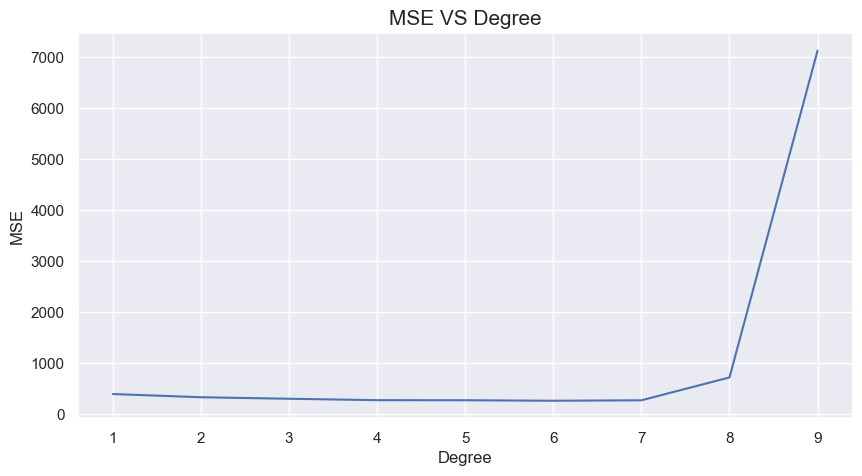

In [91]:
X = co2[["fuel_cons_comb_mpg", "engine_size"]]
y = co2["co2"]

mse_vs_poly_deg(X, y, False, "n/a")

[422.853281045673, 288.32960923780286, 271.27046467619186, 241.79233678532847, 239.56309531490805, 221.365565501732, 219.39110569148298, 241.35692113710084, 2186.072987334742]


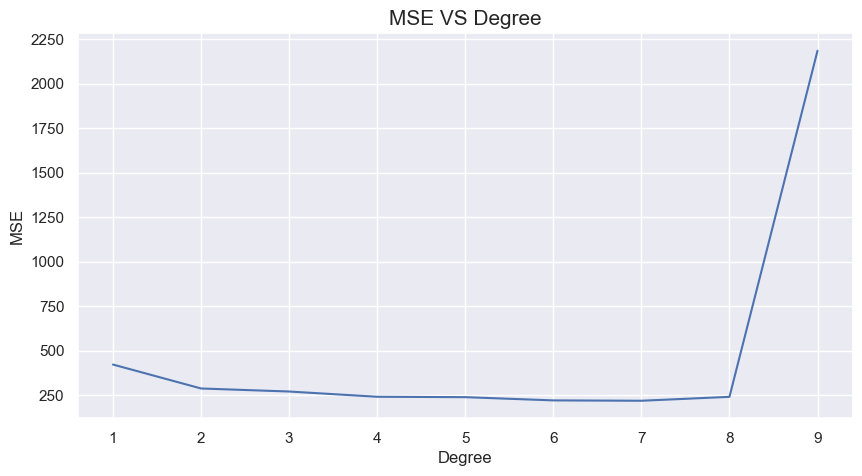

In [92]:
X = co2[["fuel_cons_comb", "engine_size"]]
y = co2["co2"]

mse_vs_poly_deg(X, y, False, "n/a")

[435.57106802086537, 295.5485170914534, 272.94675862010655, 237.3537766992551, 230.47692265228778, 6013.761455188362, 2579083.6816647537, 151494917.67913845, 327949143.9274434]


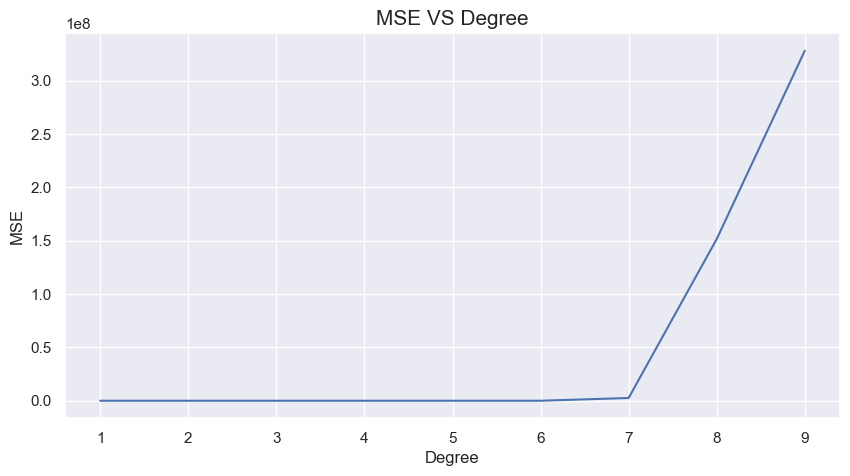

In [93]:
X = co2[["fuel_cons_comb", "cylinders"]]
y = co2["co2"]

mse_vs_poly_deg(X, y, False, "n/a")

In [94]:
def poly_model_score_show(degree, X, y):
    
    scoring_methods = ["r2", "neg_mean_squared_error", "neg_mean_absolute_error"]
    
    for scoring in scoring_methods:
        cv = RepeatedKFold(n_splits=10, n_repeats=5)
        
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)
        poly = LinearRegression()
            
        score = cross_val_score(poly, X_poly, y, cv=cv, scoring=scoring)

        print("Score type:", scoring)
        print("Maximum score:", round(max(score), 4))
        print("Minimum score:", round(min(score), 4))
        print("Mean score:", round(np.mean(score), 4))
        print("Standard deviation:", round(np.std(score), 4))
        print("\n")
    
    return

In [95]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

poly_model_score_show(4, X, y)

Score type: r2
Maximum score: 0.9091
Minimum score: 0.8472
Mean score: 0.8786
Standard deviation: 0.014


Score type: neg_mean_squared_error
Maximum score: -339.1008
Minimum score: -506.118
Mean score: -414.6939
Standard deviation: 48.5305


Score type: neg_mean_absolute_error
Maximum score: -8.6412
Minimum score: -12.3008
Mean score: -10.2205
Standard deviation: 0.7558




In [96]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

poly_model_score_show(2, X, y)

Score type: r2
Maximum score: 0.9077
Minimum score: 0.8414
Mean score: 0.8765
Standard deviation: 0.0147


Score type: neg_mean_squared_error
Maximum score: -337.2141
Minimum score: -531.5925
Mean score: -421.8597
Standard deviation: 50.7403


Score type: neg_mean_absolute_error
Maximum score: -9.8856
Minimum score: -12.0179
Mean score: -10.811
Standard deviation: 0.5177




In [154]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

poly_model_score_show(7, X, y)

Score type: r2
Maximum score: 0.9087
Minimum score: 0.8585
Mean score: 0.8809
Standard deviation: 0.0116


Score type: neg_mean_squared_error
Maximum score: -286.7097
Minimum score: -540.6223
Mean score: -406.8892
Standard deviation: 49.3442


Score type: neg_mean_absolute_error
Maximum score: -8.1638
Minimum score: -11.4525
Mean score: -9.6767
Standard deviation: 0.6124




In [97]:
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "fuel_cons_comb_mpg", "cylinders"])
y = co2_enc["co2"]

poly_model_score_show(2, X, y)

Score type: r2
Maximum score: 0.7806
Minimum score: -1.3065993694339958e+21
Mean score: -4.212264251643804e+19
Standard deviation: 1.912736689227175e+20


Score type: neg_mean_squared_error
Maximum score: -748.1311
Minimum score: -6.459667619086001e+24
Mean score: -2.3780670536188405e+23
Standard deviation: 1.022714649594458e+24


Score type: neg_mean_absolute_error
Maximum score: -21.5535
Minimum score: -137856776478.031
Mean score: -6424456720.7319
Standard deviation: 23920016394.9047




In [98]:
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "cylinders"])
y = co2_enc["co2"]
print(X.head())

poly_model_score_show(2, X, y)

   engine_size  fuel_cons_comb_mpg  fuel_type_D  fuel_type_E  fuel_type_N  \
0          2.0                  33          0.0          0.0          0.0   
1          2.4                  29          0.0          0.0          0.0   
2          1.5                  48          0.0          0.0          0.0   
3          3.5                  25          0.0          0.0          0.0   
4          3.5                  27          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  
Score type: r2
Maximum score: 0.9899
Minimum score: 0.9806
Mean score: 0.9872
Standard deviation: 0.0017


Score type: neg_mean_squared_error
Maximum score: -34.5237
Minimum score: -62.6646
Mean score: -43.817
Standard deviation: 5.9325


Score type: neg_mean_absolute_error
Maximum score: -3.9677
Minimum score: -4.892
Mean score: -4.4341
Standard deviatio

In [170]:
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "engine_size"])
y = co2_enc["co2"]
print(X.head())

poly_model_score_show(7, X, y)

   cylinders  fuel_cons_comb_mpg  fuel_type_D  fuel_type_E  fuel_type_N  \
0          4                  33          0.0          0.0          0.0   
1          4                  29          0.0          0.0          0.0   
2          4                  48          0.0          0.0          0.0   
3          6                  25          0.0          0.0          0.0   
4          6                  27          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


KeyboardInterrupt: 

### Separate Fuel Types

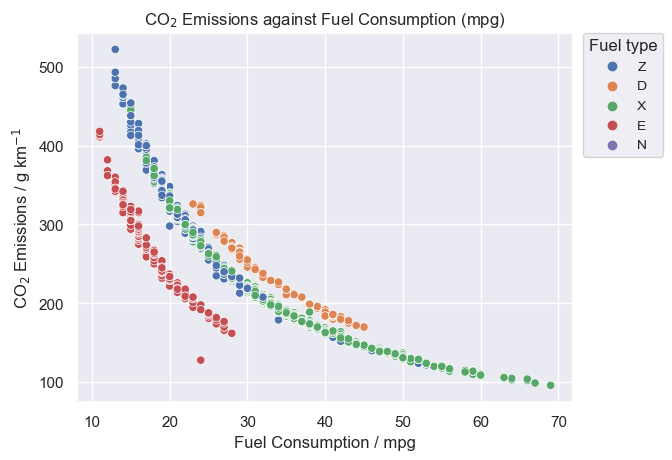

In [99]:
sp = sns.scatterplot(x="fuel_cons_comb_mpg", y="co2", data=co2, hue="fuel_type")
sp.set(xlabel ="Fuel Consumption / mpg", ylabel = "CO$_{2}$ Emissions / g km$^{-1}$", 
       title="CO$_{2}$ Emissions against Fuel Consumption (mpg)")
#plt.axhline(y = 255, color = "black", linestyle = '--', label="High Emissions") 
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0, ncol=1, fontsize="small", 
           title="Fuel type")
plt.show()

In [100]:
def predict_poly(df, degree):

    X = df[["fuel_cons_comb_mpg"]]
    y = df["co2"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    poly.fit(X_train_poly, y_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    data_pred = X_test.copy()
    X_test_poly = poly.fit_transform(X_test)
    y_pred = poly_reg.predict(X_test_poly)
    data_pred["y_pred"] = y_pred

    return data_pred

In [101]:
def kfold_model_score_poly(degree, X, y):
    
    cv = RepeatedKFold(n_splits=10, n_repeats=5)  
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly = LinearRegression()      
    score = cross_val_score(poly, X_poly, y, cv=cv, scoring="r2")

    return round(np.mean(score), 3)

In [102]:
def plot_pred_line(method):

    sp = sns.scatterplot(x="fuel_cons_comb_mpg", y="co2", data=co2, hue="fuel_type")
    _ = sns.lineplot(x="fuel_cons_comb_mpg", y="y_pred", data=data_pred_other, c="red", 
                     label="R$^{2}$: "+ str(r2_other))
    _ = sns.lineplot(x="fuel_cons_comb_mpg", y="y_pred", data=data_pred_diesel, c="green", 
                     label="R$^{2}$: "+ str(r2_diesel))
    _ = sns.lineplot(x="fuel_cons_comb_mpg", y="y_pred", data=data_pred_ethanol, c="navy", 
                     label="R$^{2}$: "+ str(r2_ethanol))
    #plt.axhline(y = 255, color = "black", linestyle = '--', label="High Emissions") 
    sp.set(xlabel ="Fuel Consumption / mpg", ylabel = "CO$_{2}$ Emissions / g km$^{-1}$", 
           title="CO$_{2}$ Emissions against Fuel Consumption (mpg) \n Using " + method + " Regression")
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0, ncol=1, fontsize="small", 
               title="Fuel type")
    h, l = sp.get_legend_handles_labels()
    l1 = sp.legend(h[:5],l[:5], loc="upper right", ncol=1, fontsize="small", title="Fuel type")
    l2 = sp.legend(h[5:],l[5:], loc="upper center", ncol=1, fontsize="small")
    sp.add_artist(l1)
    plt.show()

    return

In [103]:
data_pred_other = predict_poly(co2_other, 2)
data_pred_diesel = predict_poly(co2_diesel, 2)
data_pred_ethanol = predict_poly(co2_ethanol, 2)

In [104]:
X = co2_other[["fuel_cons_comb_mpg"]]
y = co2_other["co2"]
r2_other = kfold_model_score_poly(2, X, y)

X = co2_diesel[["fuel_cons_comb_mpg"]]
y = co2_diesel["co2"]
r2_diesel = kfold_model_score_poly(2, X, y)

X = co2_ethanol[["fuel_cons_comb_mpg"]]
y = co2_ethanol["co2"]
r2_ethanol = kfold_model_score_poly(2, X, y)

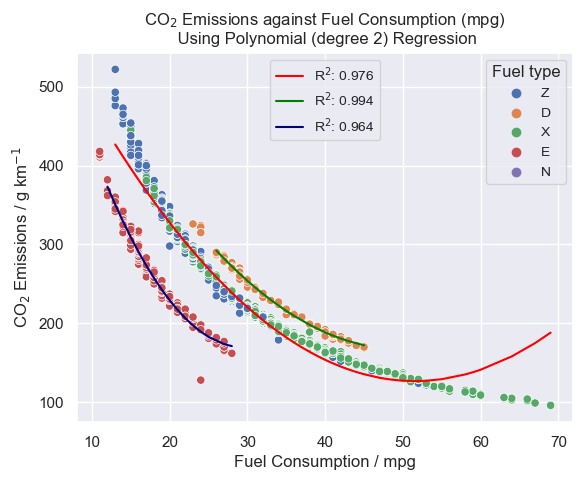

In [105]:
plot_pred_line("Polynomial (degree 2)")

In [106]:
data_pred_other = predict_poly(co2_other, 7)
data_pred_diesel = predict_poly(co2_diesel, 7)
data_pred_ethanol = predict_poly(co2_ethanol, 7)

In [107]:
X = co2_other[["fuel_cons_comb_mpg"]]
y = co2_other["co2"]
r2_other = kfold_model_score_poly(7, X, y)

X = co2_diesel[["fuel_cons_comb_mpg"]]
y = co2_diesel["co2"]
r2_diesel = kfold_model_score_poly(7, X, y)

X = co2_ethanol[["fuel_cons_comb_mpg"]]
y = co2_ethanol["co2"]
r2_ethanol = kfold_model_score_poly(7, X, y)

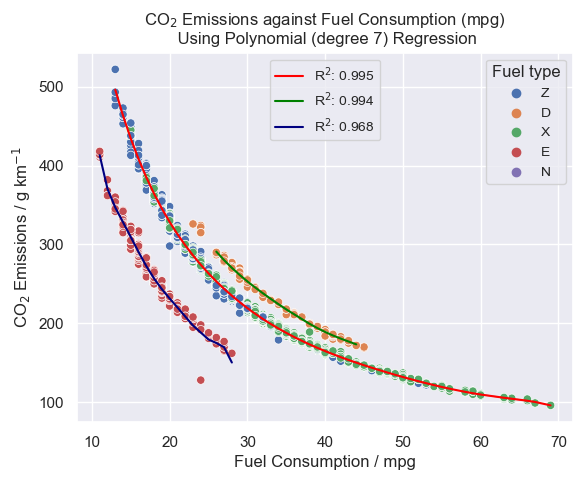

In [108]:
plot_pred_line("Polynomial (degree 7)")

### Ridge Regression

In [109]:
def l1_l2_model_score_show(model, X, y):
    
    scoring_methods = ["r2", "neg_mean_squared_error", "neg_mean_absolute_error"]
    
    for scoring in scoring_methods:
        cv = RepeatedKFold(n_splits=10, n_repeats=5)
        score = cross_val_score(model, X, y, scoring=scoring, cv=cv)

        print("Score type:", scoring)
        print("Maximum score:", round(max(score), 4))
        print("Minimum score:", round(min(score), 4))
        print("Mean score:", round(np.mean(score), 4))
        print("Standard deviation:", round(np.std(score), 4))
        print("\n")
    
    return

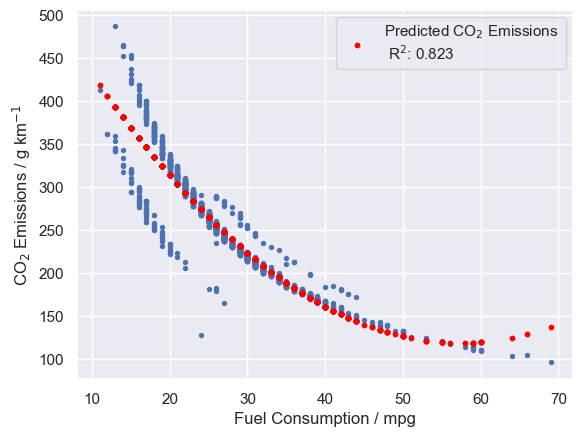

R2 test: 0.874
MSE: 417.4323
MAE: 10.6426


In [110]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
poly.fit(X_train_poly, y_train)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)

#ridge_reg = Ridge(alpha=10)
ridge_reg = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])
ridge_reg.fit(X_train_poly, y_train)
data_test = X_test.copy()
y_pred = ridge_reg.predict(X_test_poly)

data_test["co2"] = y_test
data_test["pred_co2"] = y_pred

R2 = 0.823

poly_reg_plot(data_test, "fuel_cons_comb_mpg", R2, "Fuel Consumption / mpg", "ridge_fuel_cons_mpg.png")

R2_train = ridge_reg.score(X_train_poly, y_train)
R2_test = ridge_reg.score(X_test_poly, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 test:", round(R2_test, 4))
print("MSE:", round(mse, 4))
print("MAE:", round(mae, 4))

## Predicted vs Actual

In [111]:
def pred_actual_ridge(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    poly.fit(X_train_poly, y_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    X_test_poly = poly.fit_transform(X_test)

    ridge_reg = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])
    ridge_reg.fit(X_train_poly, y_train)
    y_pred = ridge_reg.predict(X_test_poly)
    
    return y_pred, y_test

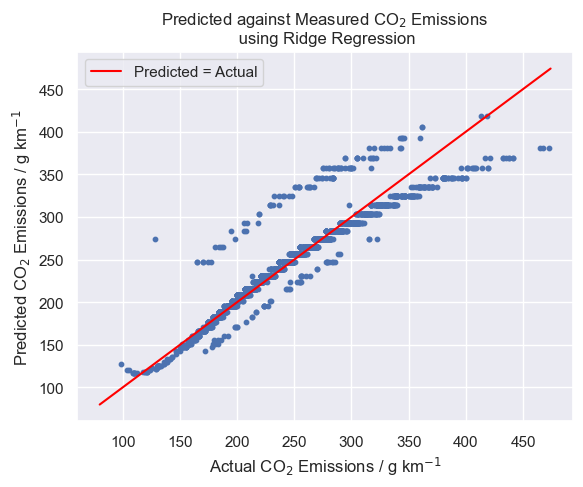

In [112]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

y_pred, y_test = pred_actual_ridge(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Ridge Regression", "pred_act_ridge1.png")

   engine_size  fuel_cons_comb  fuel_type_D  fuel_type_E  fuel_type_N  \
0          2.0             8.5          0.0          0.0          0.0   
1          2.4             9.6          0.0          0.0          0.0   
2          1.5             5.9          0.0          0.0          0.0   
3          3.5            11.1          0.0          0.0          0.0   
4          3.5            10.6          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


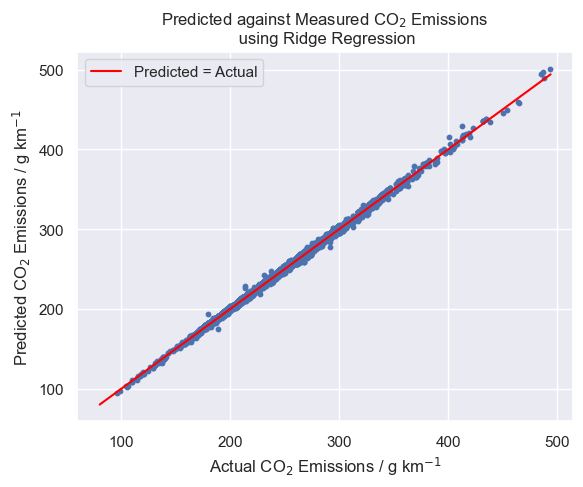

In [113]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg", "cylinders"])
print(X.head())

y_pred, y_test = pred_actual_ridge(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Ridge Regression", "pred_act_ridge2.png")

   fuel_cons_comb  fuel_type_D  fuel_type_E  fuel_type_N  fuel_type_X  \
0             8.5          0.0          0.0          0.0          0.0   
1             9.6          0.0          0.0          0.0          0.0   
2             5.9          0.0          0.0          0.0          0.0   
3            11.1          0.0          0.0          0.0          0.0   
4            10.6          0.0          0.0          0.0          0.0   

   fuel_type_Z  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  


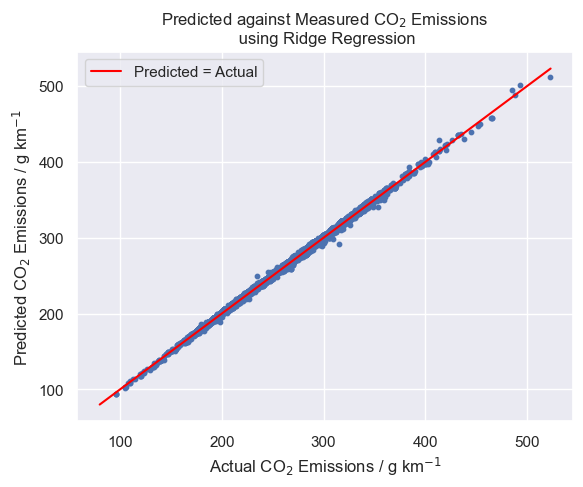

In [114]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg", "cylinders", "engine_size"])
print(X.head())

y_pred, y_test = pred_actual_ridge(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Ridge Regression", "pred_act_ridge3.png")

   cylinders  fuel_cons_comb  fuel_type_D  fuel_type_E  fuel_type_N  \
0          4             8.5          0.0          0.0          0.0   
1          4             9.6          0.0          0.0          0.0   
2          4             5.9          0.0          0.0          0.0   
3          6            11.1          0.0          0.0          0.0   
4          6            10.6          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


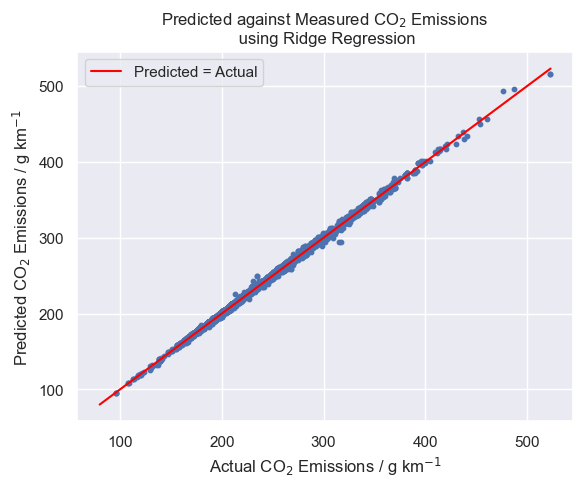

In [115]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg", "engine_size"])
print(X.head())

y_pred, y_test = pred_actual_ridge(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Ridge Regression", "pred_act_ridge4.png")

   engine_size  fuel_cons_comb_mpg  fuel_type_D  fuel_type_E  fuel_type_N  \
0          2.0                  33          0.0          0.0          0.0   
1          2.4                  29          0.0          0.0          0.0   
2          1.5                  48          0.0          0.0          0.0   
3          3.5                  25          0.0          0.0          0.0   
4          3.5                  27          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


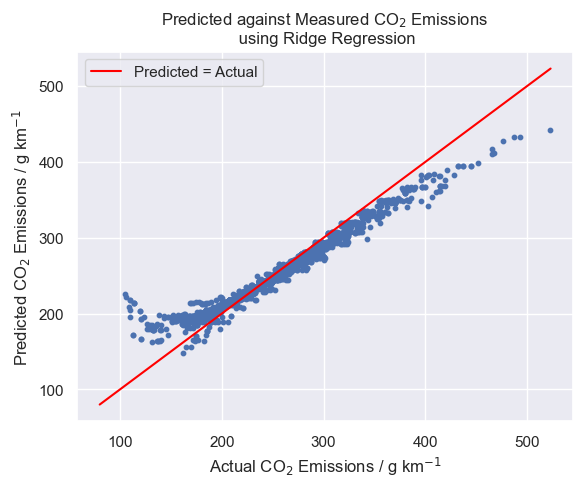

In [116]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "cylinders"])
print(X.head())

y_pred, y_test = pred_actual_ridge(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Ridge Regression", "pred_act_ridge5.png")

   cylinders  fuel_cons_comb_mpg  fuel_type_D  fuel_type_E  fuel_type_N  \
0          4                  33          0.0          0.0          0.0   
1          4                  29          0.0          0.0          0.0   
2          4                  48          0.0          0.0          0.0   
3          6                  25          0.0          0.0          0.0   
4          6                  27          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


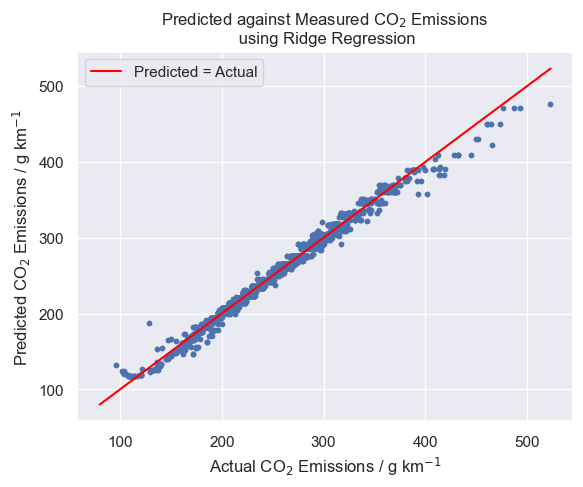

In [117]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "engine_size"])
print(X.head())

y_pred, y_test = pred_actual_ridge(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Ridge Regression", "pred_act_ridge6.png")

   engine_size  cylinders  vehicle_class_COMPACT  vehicle_class_FULL-SIZE  \
0          2.0          4                    1.0                      0.0   
1          2.4          4                    1.0                      0.0   
2          1.5          4                    1.0                      0.0   
3          3.5          6                    0.0                      0.0   
4          3.5          6                    0.0                      0.0   

   vehicle_class_MID-SIZE  vehicle_class_MINICOMPACT  vehicle_class_MINIVAN  \
0                     0.0                        0.0                    0.0   
1                     0.0                        0.0                    0.0   
2                     0.0                        0.0                    0.0   
3                     0.0                        0.0                    0.0   
4                     0.0                        0.0                    0.0   

   vehicle_class_PICKUP TRUCK - SMALL  vehicle_class_PICKUP TR

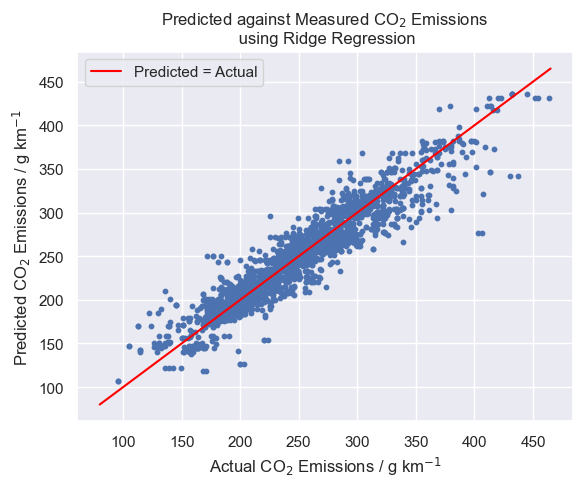

In [148]:
y = co2_enc["co2"]
X = co2_enc.drop(columns=["co2", "fuel_cons_comb_mpg", "fuel_cons_comb"])
print(X.head())

y_pred, y_test = pred_actual_ridge(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Ridge Regression", "pred_act_ridge7.png")

   engine_size  cylinders  fuel_cons_comb  fuel_cons_comb_mpg  \
0          2.0          4             8.5                  33   
1          2.4          4             9.6                  29   
2          1.5          4             5.9                  48   
3          3.5          6            11.1                  25   
4          3.5          6            10.6                  27   

   vehicle_class_COMPACT  vehicle_class_FULL-SIZE  vehicle_class_MID-SIZE  \
0                    1.0                      0.0                     0.0   
1                    1.0                      0.0                     0.0   
2                    1.0                      0.0                     0.0   
3                    0.0                      0.0                     0.0   
4                    0.0                      0.0                     0.0   

   vehicle_class_MINICOMPACT  vehicle_class_MINIVAN  \
0                        0.0                    0.0   
1                        0.0        

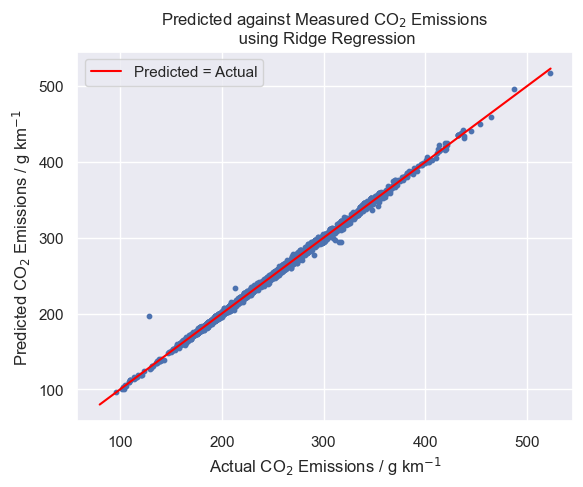

In [147]:
y = co2_enc["co2"]
X = co2_enc.drop(columns=["co2"])
print(X.head())

y_pred, y_test = pred_actual_ridge(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "Ridge Regression", "pred_act_ridge8.png")

## K-Fold Cross Validation

In [119]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

#ridge_regression = Ridge(alpha=1.0)
ridge_regression = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])

l1_l2_model_score_show(ridge_regression, X, y)

Score type: r2
Maximum score: 0.8617
Minimum score: 0.7688
Mean score: 0.8229
Standard deviation: 0.0162


Score type: neg_mean_squared_error
Maximum score: -486.8071
Minimum score: -749.8822
Mean score: -605.5972
Standard deviation: 53.2967


Score type: neg_mean_absolute_error
Maximum score: -15.1396
Minimum score: -17.7627
Mean score: -16.2187
Standard deviation: 0.6703




In [120]:
X = co2[["engine_size", "cylinders", "fuel_cons_comb"]]
y = co2["co2"]

#ridge_regression = Ridge(alpha=1.0)
ridge_regression = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])

l1_l2_model_score_show(ridge_regression, X, y)

Score type: r2
Maximum score: 0.9037
Minimum score: 0.8359
Mean score: 0.8787
Standard deviation: 0.0116


Score type: neg_mean_squared_error
Maximum score: -357.1598
Minimum score: -480.8797
Mean score: -414.3976
Standard deviation: 31.2908


Score type: neg_mean_absolute_error
Maximum score: -12.5804
Minimum score: -14.5858
Mean score: -13.444
Standard deviation: 0.5024




In [121]:
co2_enc.head()

,engine_size,cylinders,fuel_cons_comb,fuel_cons_comb_mpg,co2,vehicle_class_COMPACT,vehicle_class_FULL-SIZE,vehicle_class_MID-SIZE,vehicle_class_MINICOMPACT,vehicle_class_MINIVAN,...,transmission_AV7,transmission_AV8,transmission_M5,transmission_M6,transmission_M7,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z
0,2.0,4,8.5,33,196,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,9.6,29,221,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,5.9,48,136,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,11.1,25,255,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,10.6,27,244,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [122]:
X = co2[["engine_size", "cylinders", "fuel_cons_comb_mpg"]]
y = co2["co2"]

#ridge_regression = Ridge(alpha=1.0)
ridge_regression = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])

l1_l2_model_score_show(ridge_regression, X, y)

Score type: r2
Maximum score: 0.9047
Minimum score: 0.8763
Mean score: 0.8937
Standard deviation: 0.0064


Score type: neg_mean_squared_error
Maximum score: -304.6623
Minimum score: -434.0483
Mean score: -363.4912
Standard deviation: 32.5251


Score type: neg_mean_absolute_error
Maximum score: -11.5679
Minimum score: -13.7458
Mean score: -12.6162
Standard deviation: 0.5557




In [123]:
y = co2_enc["co2"]
X = co2_enc.drop(columns=["co2"])

ridge_regression = RidgeCV(alphas = [1, 10, 20, 50, 100])

l1_l2_model_score_show(ridge_regression, X, y)

Score type: r2
Maximum score: 0.9954
Minimum score: 0.9904
Mean score: 0.9929
Standard deviation: 0.0011


Score type: neg_mean_squared_error
Maximum score: -14.5492
Minimum score: -31.783
Mean score: -24.2447
Standard deviation: 4.233


Score type: neg_mean_absolute_error
Maximum score: -2.7155
Minimum score: -3.2979
Mean score: -2.9961
Standard deviation: 0.1381




In [124]:
X.head()

,engine_size,cylinders,fuel_cons_comb,fuel_cons_comb_mpg,vehicle_class_COMPACT,vehicle_class_FULL-SIZE,vehicle_class_MID-SIZE,vehicle_class_MINICOMPACT,vehicle_class_MINIVAN,vehicle_class_PICKUP TRUCK - SMALL,...,transmission_AV7,transmission_AV8,transmission_M5,transmission_M6,transmission_M7,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z
0,2.0,4,8.5,33,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,9.6,29,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,5.9,48,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,11.1,25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,10.6,27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
y = co2_enc["co2"]
X = co2_enc.drop(columns=["co2", "fuel_cons_comb", "fuel_cons_comb_mpg"])

ridge_regression = RidgeCV(alphas = [1, 10, 20, 50, 100])

l1_l2_model_score_show(ridge_regression, X, y)

Score type: r2
Maximum score: 0.8692
Minimum score: 0.8252
Mean score: 0.8508
Standard deviation: 0.0108


Score type: neg_mean_squared_error
Maximum score: -442.165
Minimum score: -588.349
Mean score: -509.7547
Standard deviation: 30.0422


Score type: neg_mean_absolute_error
Maximum score: -15.8181
Minimum score: -18.248
Mean score: -17.0896
Standard deviation: 0.6051




### Separate Fuel Types

In [126]:
def predict_ridge(df):

    X = df[["fuel_cons_comb_mpg"]]
    y = df["co2"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    poly.fit(X_train_poly, y_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    X_test_poly = poly.fit_transform(X_test)

    ridge_reg = RidgeCV(alphas = [0.1, 1, 10, 100])
    ridge_reg.fit(X_train_poly, y_train)
    y_pred = ridge_reg.predict(X_test_poly)

    data_pred = X_test.copy()
    data_pred["y_pred"] = y_pred

    return data_pred

In [127]:
def kfold_model_score_l1_l2(model, X, y):

    cv = RepeatedKFold(n_splits=10, n_repeats=5)
    score = cross_val_score(model, X, y, scoring="r2", cv=cv)

    return round(np.mean(score), 3)

In [128]:
data_pred_other = predict_ridge(co2_other)
data_pred_diesel = predict_ridge(co2_diesel)
data_pred_ethanol = predict_ridge(co2_ethanol)

In [129]:
ridge_regression = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])

X = co2_other[["fuel_cons_comb_mpg"]]
y = co2_other["co2"]
r2_other = kfold_model_score_l1_l2(ridge_regression, X, y)

X = co2_diesel[["fuel_cons_comb_mpg"]]
y = co2_diesel["co2"]
r2_diesel = kfold_model_score_l1_l2(ridge_regression, X, y)

X = co2_ethanol[["fuel_cons_comb_mpg"]]
y = co2_ethanol["co2"]
r2_ethanol = kfold_model_score_l1_l2(ridge_regression, X, y)

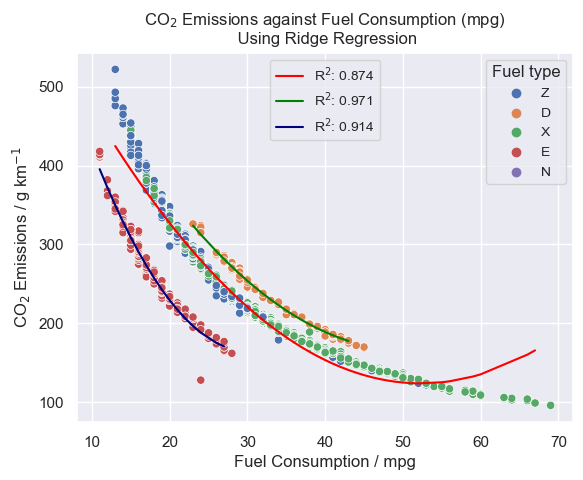

In [130]:
plot_pred_line("Ridge")

### LASSO Regression

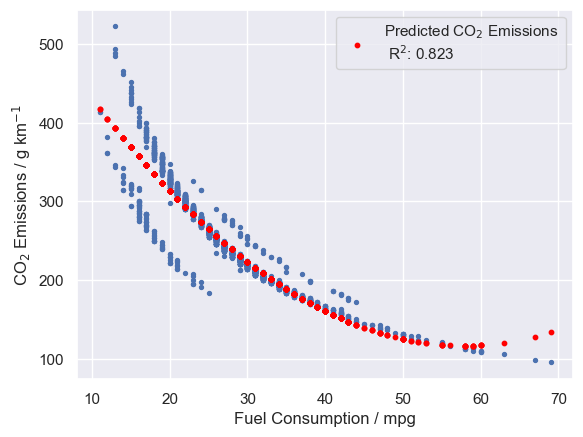

R2 test: 0.8769
MSE: 424.2795
MAE: 10.8473


In [131]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
poly.fit(X_train_poly, y_train)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
X_test_poly = poly.fit_transform(X_test)

#lasso_reg = Lasso(alpha=10)
lasso_reg = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])
lasso_reg.fit(X_train_poly, y_train)
data_test = X_test.copy()
y_pred = lasso_reg.predict(X_test_poly)

data_test["co2"] = y_test
data_test["pred_co2"] = y_pred

R2 = 0.823

poly_reg_plot(data_test, "fuel_cons_comb_mpg", R2, "Fuel Consumption / mpg", "lasso_fuel_cons_mpg.png")

R2_train = lasso_reg.score(X_train_poly, y_train)
R2_test = lasso_reg.score(X_test_poly, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 test:", round(R2_test, 4))
print("MSE:", round(mse, 4))
print("MAE:", round(mae, 4))

## Predicted vs Actual

In [132]:
def pred_actual_lasso(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    poly.fit(X_train_poly, y_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    X_test_poly = poly.fit_transform(X_test)

    #lasso_reg = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])
    lasso_reg = LassoCV(alphas = [1, 10, 20, 50, 100])
    lasso_reg.fit(X_train_poly, y_train)
    y_pred = lasso_reg.predict(X_test_poly)
    
    return y_pred, y_test

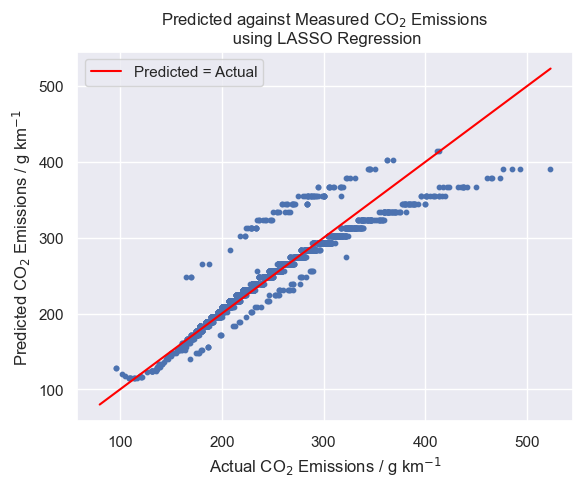

In [133]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

y_pred, y_test = pred_actual_lasso(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "LASSO Regression", "pred_act_lasso1.png")

   engine_size  cylinders  vehicle_class_COMPACT  vehicle_class_FULL-SIZE  \
0          2.0          4                    1.0                      0.0   
1          2.4          4                    1.0                      0.0   
2          1.5          4                    1.0                      0.0   
3          3.5          6                    0.0                      0.0   
4          3.5          6                    0.0                      0.0   

   vehicle_class_MID-SIZE  vehicle_class_MINICOMPACT  vehicle_class_MINIVAN  \
0                     0.0                        0.0                    0.0   
1                     0.0                        0.0                    0.0   
2                     0.0                        0.0                    0.0   
3                     0.0                        0.0                    0.0   
4                     0.0                        0.0                    0.0   

   vehicle_class_PICKUP TRUCK - SMALL  vehicle_class_PICKUP TR

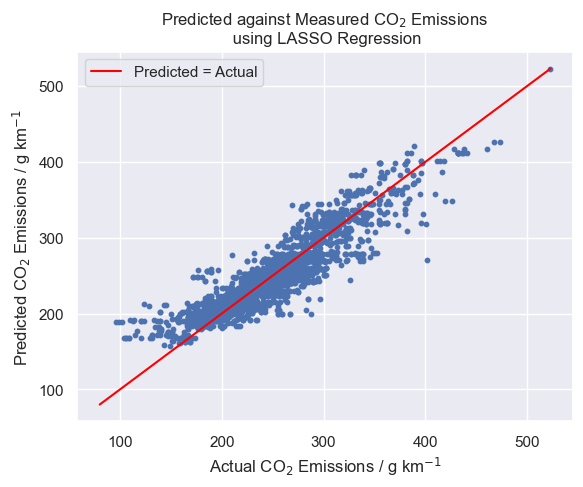

In [149]:
y = co2_enc["co2"]
X = co2_enc.drop(columns=["co2", "fuel_cons_comb_mpg", "fuel_cons_comb"])
print(X.head())

y_pred, y_test = pred_actual_lasso(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "LASSO Regression", "pred_act_lasso2.png")

   engine_size  fuel_cons_comb_mpg  fuel_type_D  fuel_type_E  fuel_type_N  \
0          2.0                  33          0.0          0.0          0.0   
1          2.4                  29          0.0          0.0          0.0   
2          1.5                  48          0.0          0.0          0.0   
3          3.5                  25          0.0          0.0          0.0   
4          3.5                  27          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


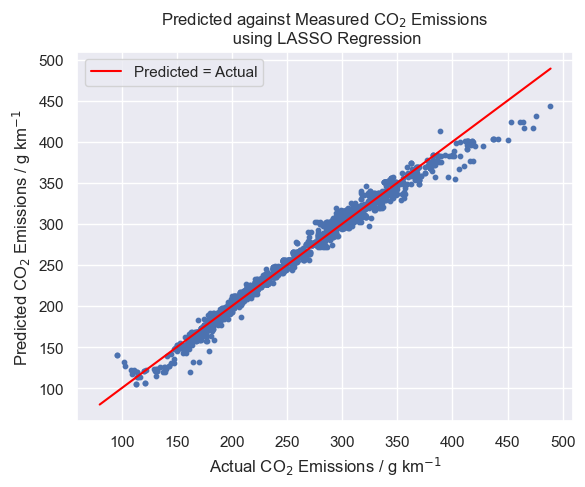

In [135]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb", "cylinders"])
print(X.head())

y_pred, y_test = pred_actual_lasso(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "LASSO Regression", "pred_act_lasso3.png")

   engine_size  fuel_cons_comb  fuel_type_D  fuel_type_E  fuel_type_N  \
0          2.0             8.5          0.0          0.0          0.0   
1          2.4             9.6          0.0          0.0          0.0   
2          1.5             5.9          0.0          0.0          0.0   
3          3.5            11.1          0.0          0.0          0.0   
4          3.5            10.6          0.0          0.0          0.0   

   fuel_type_X  fuel_type_Z  
0          0.0          1.0  
1          0.0          1.0  
2          0.0          1.0  
3          0.0          1.0  
4          0.0          1.0  


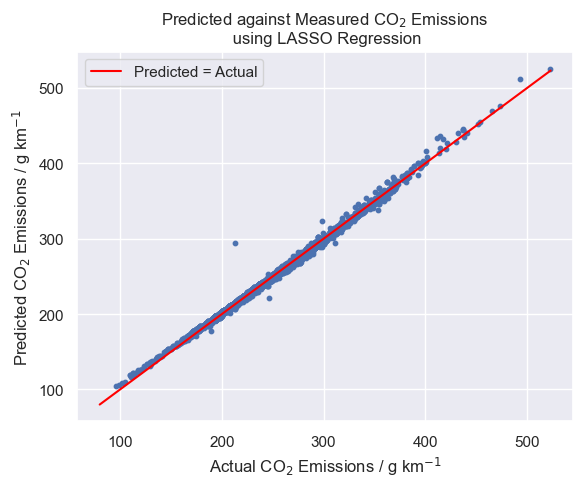

In [136]:
y = co2_enc_fuel["co2"]
X = co2_enc_fuel.drop(columns=["co2", "fuel_cons_comb_mpg", "cylinders"])
print(X.head())

y_pred, y_test = pred_actual_lasso(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "LASSO Regression", "pred_act_lasso4.png")

   engine_size  cylinders  fuel_cons_comb  vehicle_class_COMPACT  \
0          2.0          4             8.5                    1.0   
1          2.4          4             9.6                    1.0   
2          1.5          4             5.9                    1.0   
3          3.5          6            11.1                    0.0   
4          3.5          6            10.6                    0.0   

   vehicle_class_FULL-SIZE  vehicle_class_MID-SIZE  vehicle_class_MINICOMPACT  \
0                      0.0                     0.0                        0.0   
1                      0.0                     0.0                        0.0   
2                      0.0                     0.0                        0.0   
3                      0.0                     0.0                        0.0   
4                      0.0                     0.0                        0.0   

   vehicle_class_MINIVAN  vehicle_class_PICKUP TRUCK - SMALL  \
0                    0.0                

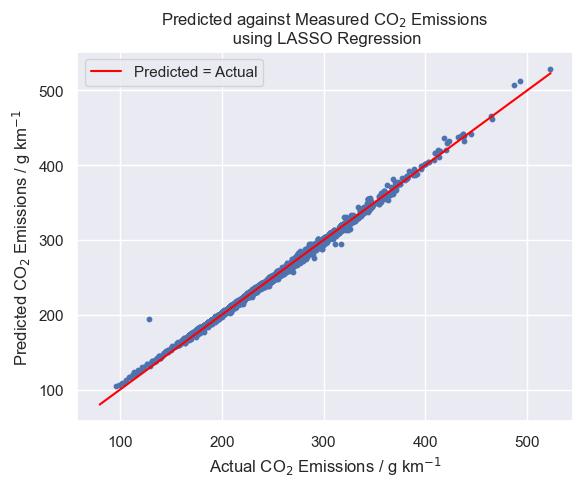

In [172]:
y = co2_enc["co2"]
X = co2_enc.drop(columns=["co2", "fuel_cons_comb_mpg"])
print(X.head())

y_pred, y_test = pred_actual_lasso(X, y)

plot_pred_actual(y_pred.tolist(), y_test.tolist(), "LASSO Regression", "pred_act_lasso5.png")

## K-Fold Cross Validation

In [137]:
X = co2[["fuel_cons_comb_mpg"]]
y = co2["co2"]

#lasso_regression = Lasso(alpha=10)
lasso_regression = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])

l1_l2_model_score_show(lasso_regression, X, y)

Score type: r2
Maximum score: 0.8456
Minimum score: 0.796
Mean score: 0.8232
Standard deviation: 0.0112


Score type: neg_mean_squared_error
Maximum score: -468.8222
Minimum score: -795.5094
Mean score: -605.6217
Standard deviation: 67.4648


Score type: neg_mean_absolute_error
Maximum score: -14.6337
Minimum score: -18.1433
Mean score: -16.2372
Standard deviation: 0.6838




In [138]:
X = co2[["engine_size", "cylinders", "fuel_cons_comb"]]
y = co2["co2"]

#lasso_regression = Lasso(alpha=10)
lasso_regression = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])

l1_l2_model_score_show(lasso_regression, X, y)

Score type: r2
Maximum score: 0.9047
Minimum score: 0.8481
Mean score: 0.8787
Standard deviation: 0.0117


Score type: neg_mean_squared_error
Maximum score: -327.5115
Minimum score: -495.8558
Mean score: -414.4681
Standard deviation: 38.7899


Score type: neg_mean_absolute_error
Maximum score: -12.1319
Minimum score: -14.5737
Mean score: -13.4275
Standard deviation: 0.5624




In [139]:
X = co2[["engine_size", "cylinders", "fuel_cons_comb_mpg"]]
y = co2["co2"]

#lasso_regression = Lasso(alpha=10)
lasso_regression = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])

l1_l2_model_score_show(lasso_regression, X, y)

Score type: r2
Maximum score: 0.9091
Minimum score: 0.8787
Mean score: 0.8937
Standard deviation: 0.0073


Score type: neg_mean_squared_error
Maximum score: -307.0701
Minimum score: -420.6829
Mean score: -363.4245
Standard deviation: 30.0456


Score type: neg_mean_absolute_error
Maximum score: -11.6656
Minimum score: -13.3986
Mean score: -12.6215
Standard deviation: 0.4091




In [140]:
y = co2_enc["co2"]
X = co2_enc.drop(columns=["co2"])

lasso_regression = LassoCV(alphas = [1, 10, 20, 50, 100])

l1_l2_model_score_show(lasso_regression, X, y)

Score type: r2
Maximum score: 0.9787
Minimum score: 0.9669
Mean score: 0.974
Standard deviation: 0.0027


Score type: neg_mean_squared_error
Maximum score: -74.5411
Minimum score: -105.4467
Mean score: -88.9312
Standard deviation: 8.2322


Score type: neg_mean_absolute_error
Maximum score: -5.4805
Minimum score: -6.6428
Mean score: -6.1479
Standard deviation: 0.2377




In [141]:
X.head()

,engine_size,cylinders,fuel_cons_comb,fuel_cons_comb_mpg,vehicle_class_COMPACT,vehicle_class_FULL-SIZE,vehicle_class_MID-SIZE,vehicle_class_MINICOMPACT,vehicle_class_MINIVAN,vehicle_class_PICKUP TRUCK - SMALL,...,transmission_AV7,transmission_AV8,transmission_M5,transmission_M6,transmission_M7,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z
0,2.0,4,8.5,33,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,9.6,29,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,5.9,48,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,11.1,25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,10.6,27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [142]:
y = co2_enc["co2"]
X = co2_enc.drop(columns=["co2", "fuel_cons_comb", "fuel_cons_comb_mpg"])

lasso_regression = LassoCV(alphas = [1, 10, 20, 50, 100])

l1_l2_model_score_show(lasso_regression, X, y)

Score type: r2
Maximum score: 0.8195
Minimum score: 0.7358
Mean score: 0.7656
Standard deviation: 0.0163


Score type: neg_mean_squared_error
Maximum score: -686.0872
Minimum score: -887.7013
Mean score: -800.4959
Standard deviation: 42.9346


Score type: neg_mean_absolute_error
Maximum score: -19.8964
Minimum score: -23.2122
Mean score: -21.5007
Standard deviation: 0.6601




### Separate Fuel Types

In [143]:
def predict_lasso(df):

    X = df[["fuel_cons_comb_mpg"]]
    y = df["co2"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    poly.fit(X_train_poly, y_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    X_test_poly = poly.fit_transform(X_test)

    lasso_reg = LassoCV(alphas = [0.1, 1, 10, 100])
    lasso_reg.fit(X_train_poly, y_train)
    y_pred = lasso_reg.predict(X_test_poly)

    data_pred = X_test.copy()
    data_pred["y_pred"] = y_pred

    return data_pred

In [144]:
data_pred_other = predict_lasso(co2_other)
data_pred_diesel = predict_lasso(co2_diesel)
data_pred_ethanol = predict_lasso(co2_ethanol)

In [145]:
lasso_regression = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100])

X = co2_other[["fuel_cons_comb_mpg"]]
y = co2_other["co2"]
r2_other = kfold_model_score_l1_l2(lasso_regression, X, y)

X = co2_diesel[["fuel_cons_comb_mpg"]]
y = co2_diesel["co2"]
r2_diesel = kfold_model_score_l1_l2(lasso_regression, X, y)

X = co2_ethanol[["fuel_cons_comb_mpg"]]
y = co2_ethanol["co2"]
r2_ethanol = kfold_model_score_l1_l2(lasso_regression, X, y)

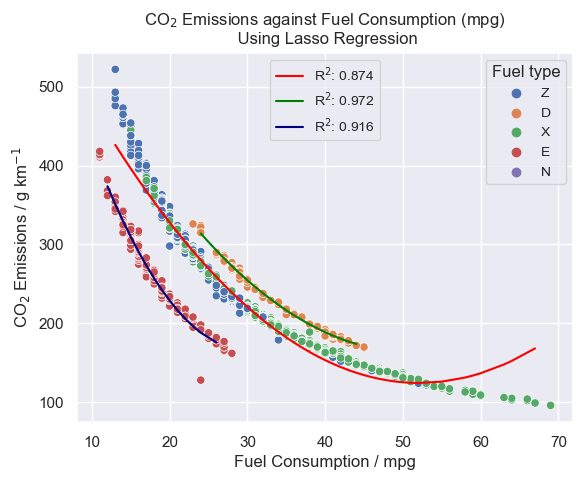

In [146]:
plot_pred_line("Lasso")